**Importing the Necessary Python Libraries for Data Analysis.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns
sns.set(color_codes=True)
import plotly.graph_objects as ply
import plotly.figure_factory as ff
import plotly.express as px
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

**Problem Statement 1**

For this particular assignment, the data of different types of wine sales in the 20th century is to be analyzed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyze and forecast Wine Sales in the 20th century.

#### 1. Read the data as an appropriate Time Series data and plot the data.

##### Loading the Dataset csv file of Problem Statement 1.

In [2]:
df_1 = pd.read_csv("Sparkling.csv")

##### Checking the Records of the Dataset.

In [3]:
df_1.head(10) #Head of the Dataset - First 10 Records of the Dataset.¶

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471
5   1980-06       1377
6   1980-07       1966
7   1980-08       2453
8   1980-09       1984
9   1980-10       2596

In [4]:
df_1.tail(10) #Tail of the Dataset - Last 10 Records of the Dataset.

YearMonth  Sparkling
177   1994-10       3385
178   1994-11       3729
179   1994-12       5999
180   1995-01       1070
181   1995-02       1402
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

##### Plot of the Data

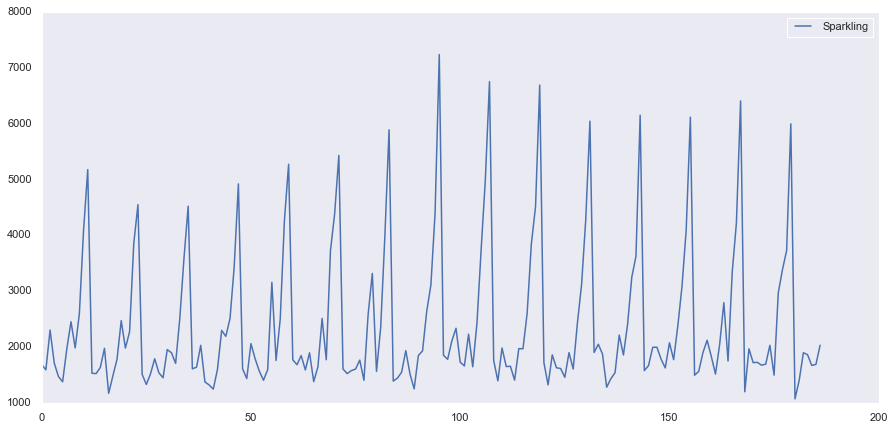

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,7
df_1.plot();
plt.grid()

<span class="burk">**Note:**</span>

Though the above plot looks like a Time Series plot, notice that the X-Axis is not time. In order to make the X-Axis as a Time Series, we need to pass the date range manually through a command in Pandas.

##### Adding the Time Stamp into Dataset.

In [6]:
Date= pd.date_range(start= '1/1/1980', end='8/1/1995', freq='M')

<span class="burk">Note</span>

The time stamps (in the above code snippet) is defined as a monthly Time Series after looking at the data.Data given to us is start from Jan 1980 to July 1995 , In order to make the X-Axis as a Time Series, we need to pass the date range from start= '1/1/1980', end='8/1/1995' as we know that the when we using this data_range function always creates the time stamp with the last day of that month,when we include this into dataset we will see that the first observation of the time stamp will be 31 Jan 1980 , so in order to include the July we will write the end period as end='8/1/1995' now it automatically take the last day of July 31 for this dataset,as we know the frequency is "monthly" so we set it freq = "M".

In [7]:
Date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

<span class="burk">Note</span>

Last date of every month is being used here from 31 Jan 1980 till 31 July 1995.

In [8]:
df_1['Time_Stamp'] = pd.DataFrame(Date,columns=['Month'])

##### Checking the Records of the Dataset after adding Time_Stamp.

In [9]:
df_1.head(10) #Head of the Dataset - First 10 Records of the Dataset.¶

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31
5   1980-06       1377 1980-06-30
6   1980-07       1966 1980-07-31
7   1980-08       2453 1980-08-31
8   1980-09       1984 1980-09-30
9   1980-10       2596 1980-10-31

In [10]:
df_1.tail(10) #Tail of the Dataset - Last 10 Records of the Dataset.

YearMonth  Sparkling Time_Stamp
177   1994-10       3385 1994-10-31
178   1994-11       3729 1994-11-30
179   1994-12       5999 1994-12-31
180   1995-01       1070 1995-01-31
181   1995-02       1402 1995-02-28
182   1995-03       1897 1995-03-31
183   1995-04       1862 1995-04-30
184   1995-05       1670 1995-05-31
185   1995-06       1688 1995-06-30
186   1995-07       2031 1995-07-31

##### Dropping the Unusual column like YearMonth & Set Index  to Time Stamp.

In [11]:
df = df_1.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head(10)

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471
1980-06-30       1377
1980-07-31       1966
1980-08-31       2453
1980-09-30       1984
1980-10-31       2596

##### Changing the Name of the Sparkling Column to Sparkling Wines Sales for Better Understandings.

In [12]:
df.rename(columns = {'Sparkling':'Sparkling Wine Sales'}, inplace = True)

In [13]:
df.head()

Sparkling Wine Sales
Time_Stamp                      
1980-01-31                  1686
1980-02-29                  1591
1980-03-31                  2304
1980-04-30                  1712
1980-05-31                  1471

<span class="burk">Note</span>

Now we successfully creates the Time Series object, let us go ahead and analyze the Time Series plot that we got.

##### Plot of the Data After Adding Time_Stamp.

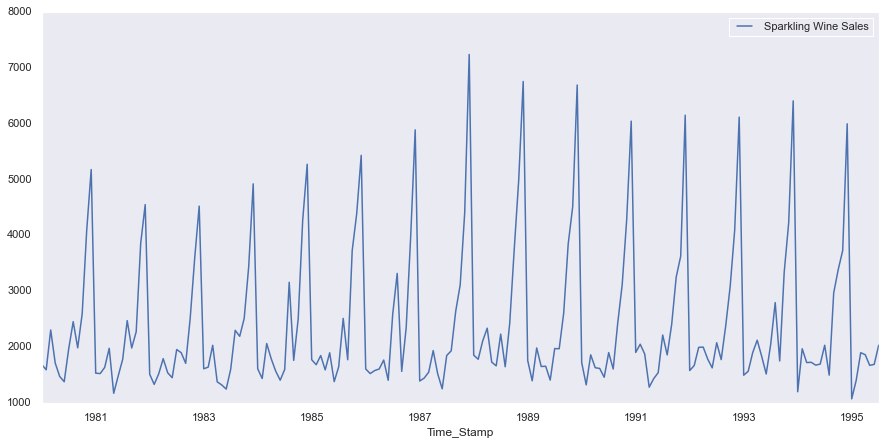

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,7
df.plot();
plt.grid()

<span class="mark">**Insights**</span>

We notice that there is some kind of increasing trend in the initial years which stabilizes as the years (or more specifically the months in each of the years) progresses. There is some kind of seasonality associated in the data as well.

#### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

##### Exploratory Data Analysis

###### Checking the Summary of the Dataset.

In [15]:
df.describe()

Sparkling Wine Sales
count            187.000000
mean            2402.417112
std             1295.111540
min             1070.000000
25%             1605.000000
50%             1874.000000
75%             2549.000000
max             7242.000000

In [16]:
data_matrix = [['Statistical Summary','Values'],
              ['count' , 187.000000],
              ['mean' ,  2402.417112],
              ['std', 1295.111540],
              ['min' , 1070.000000],
              ['25%' , 1605.000000],
              ['50%' , 1874.000000],
              ['75%' , 2549.000000],
              ['max' ,7242.000000]]
fig = ff.create_table(data_matrix)
fig.show()

<span class="burk">Note</span> 

The describe ( ) method computes and displays summary statistics for a Python dataframe.From the above table we can infer the count,mean, std , 25% , 50% ,75% and min & max values of the 	Sparkling Wine Sales column present in the dataset.

<span class="mark">Insights</span>

* Sparkling Wine Sales ranges from a minimum of 1070 to maximum of 7242.
* Mean of the Sparkling Wine Sales is around 2402.417112.
* Standard Deviation of the Sparkling Wine Sales is 1295.111540.
* 25% , 50% (median) and 75 % of Sparkling Wine Sales are 1605 , 1874 and 2549.


###### Checking the Appropriateness of Data-types & Information of the Dataframe.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Sparkling Wine Sales  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


The info( ) function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index d-type and column d-types, non-null values and memory usage.

In [18]:
data_info_table = [['S.No.','Features / Columns','Non-Null Count','Dtype','Memory Usage'],
              [1,' Sparkling Wine Sales' ,'187 non-null','int64','2.9KB']]
fig = ff.create_table(data_info_table)
fig.show()

<span class="mark">Insights</span>

From the above results we can see that there is no null values present in the dataset.Their are total 187 entries of Sparkling wines Sales as per Monthly frequency in this dataset,indexed from 1980-01-31 to 1995-07-31.Sparkling Wine Sales column have d-type of int64. Memory used by the dataset: 2.9 KB.

###### Checking the Null Values in the Dataset.

In [19]:
df.isnull().sum()

Sparkling Wine Sales    0
dtype: int64

In [20]:
null_check_table = [['S.No.','Features / Columns','Null Count'],
              [1,'Sparkling Wine Sales' ,0]]
fig = ff.create_table(null_check_table)
fig.show()

<span class="mark">Insights</span>

There is No Null Present in the Dataset.

###### Checking the Shape of the Dataframe.

In [21]:
df.shape

(187, 1)

<span class="burk">Note</span>

Shape attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data.

In [22]:
shape = [['No. of Rows', 'No. of Columns'],
        [187 , 1]]
table = ff.create_table(shape)
table
            

<span class="mark">Insights</span>

The Sparkling.csv data set has 187 observations (rows) and 1 variable (column named as Sparkling Wine Sales) in the dataset.

##### Data Visualization of  the Time Series

###### Year on Year boxplot for the Sparkling Wine Sales.

<span class="burk">Note</span>

* A box-plot gives a nice summary of one or several numeric variables. The line that divides the box into 2 parts represents the median of the data. The end of the box shows the upper and lower quartiles. The extreme lines show the highest and lowest value excluding outliers.

* Now, let us plot a box and whisker (1.5* IQR) plot to understand the spread of the data and check for outliers in each year, if any.

Text(0, 0.5, 'Yearly  Sparkling Wine Sales Variation')

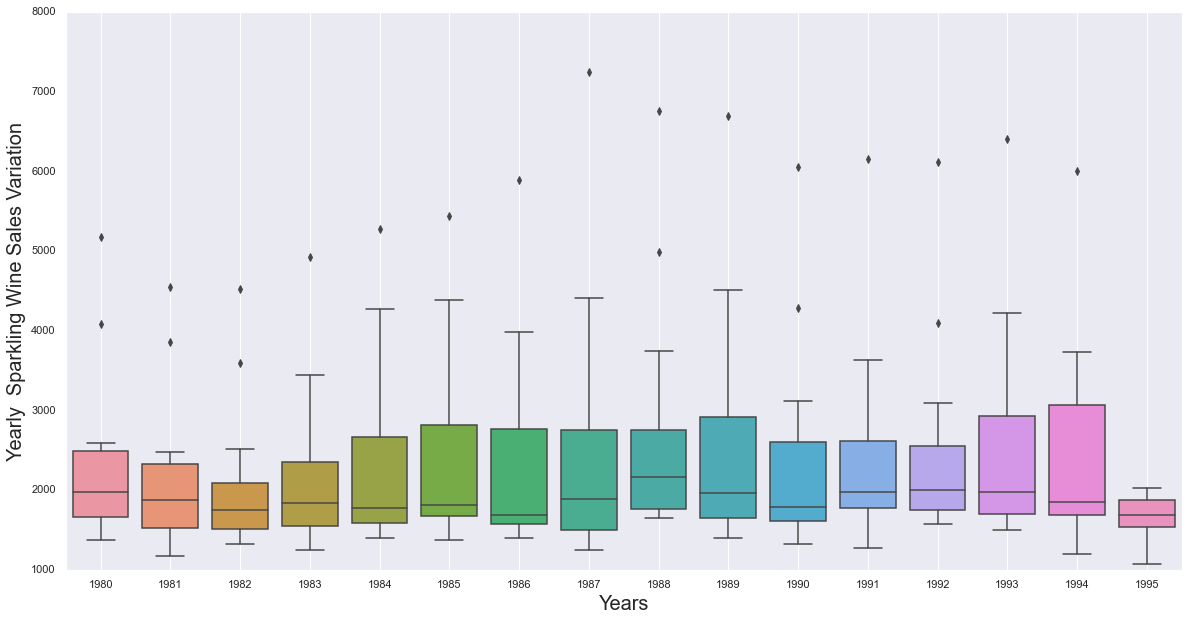

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(df.index.year, df["Sparkling Wine Sales"],whis=1.5)
plt.grid();
ax.set_xlabel('Years', fontsize = 20)
ax.set_ylabel('Yearly  Sparkling Wine Sales Variation', fontsize = 20)

<span class="mark">Insights</span>


* As we got to know from the Time Series plot, the box-plots over here also indicates a measure of trend being present. Also, we see that the Sparkling Wine Sales have outliers for the years.

* Box-plot of Year 1988 have max median value,we can clearly infer that year 1988 have maximum Sparkling Wine Sales.

* Box-plot of Year 1995 have min median value,we can clearly infer that year 1995 have minimum Sparkling Wine Sales.

###### Monthly Box-Plot for the Sparkling Wine Sales Taking all the Years into Account

<span class="burk">Note</span>

Since this is a monthly data, let us plot a box and whisker (1.5* IQR) plot to understand the spread of the data and check for outliers for every month across all the years, if any.

Text(0, 0.5, 'Monthly Sparkling Wine Sales Variation')

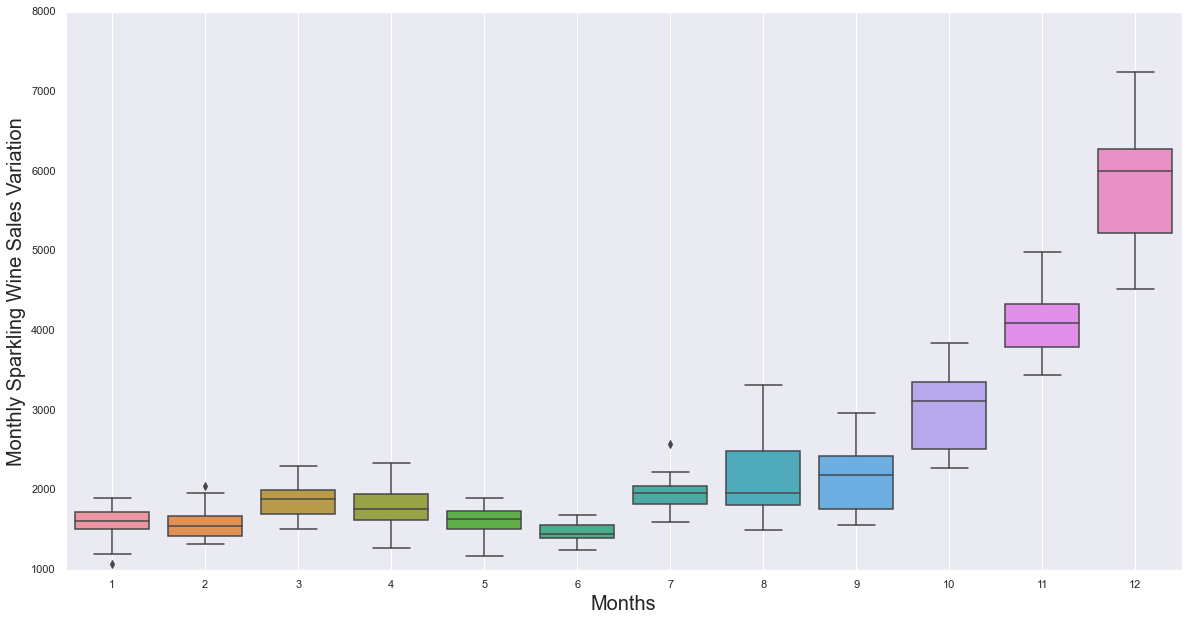

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(df.index.month, df["Sparkling Wine Sales"],whis=1.5)
plt.grid();
ax.set_xlabel('Months', fontsize = 20)
ax.set_ylabel('Monthly Sparkling Wine Sales Variation', fontsize = 20)

<span class="mark">Insights</span>

* The Box-Plots for the monthly Sparkling Wine Sales for different years doesn't show too much outliers only month 1 , 2 & 7 show outliers , rest doesn't show any outliers.

* From September to December the Sparkling Wine Sales increasing , so this the period where the Sparkling Wine Sales is highest.

* There is seasonality also every year from September to December the Sparkling Wine Sales increasing.

* In June month we have lowest sales of the Sparkling Wine.

###### Monthplot of Sparkling Wine Sales Time Series

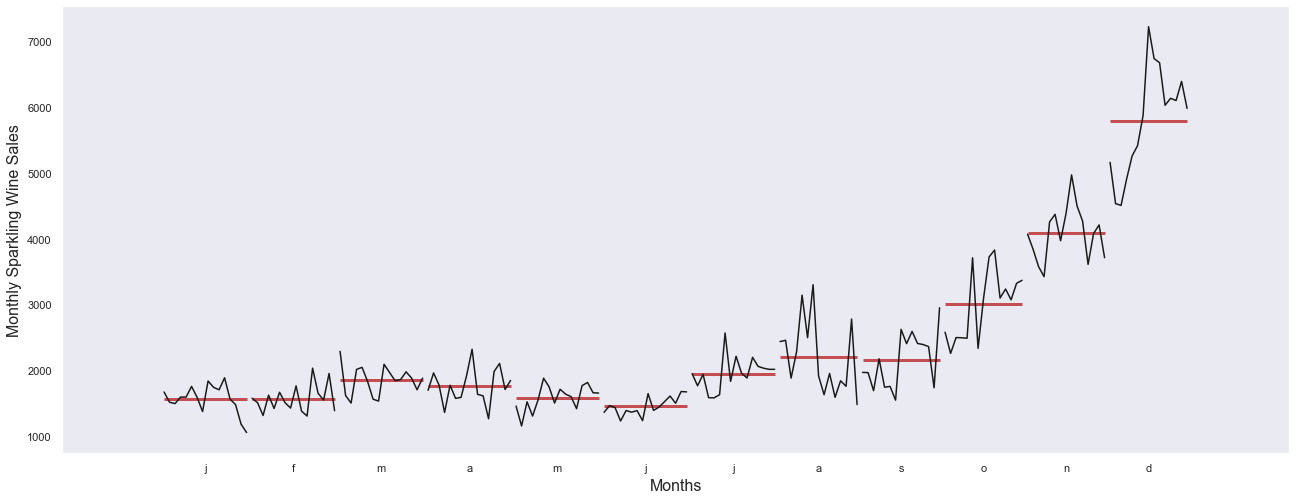

In [25]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))
month_plot(df, ylabel="Sparkling Wine Sales",ax=ax)
ax.set_xlabel('Months', fontsize = 16)
ax.set_ylabel('Monthly Sparkling Wine Sales', fontsize = 16)
plt.grid();

<span class="burk">Note</span>

This plot shows the variations of the Sparkling Wine Sales values across the months & this red line is the mean value of the Sparkling Wine Sales for every month.



<span class="mark">Insights</span>

* As noticed in the above box-plot we get same result from here too. From September to December Sparkling Wine Sales goes on increasing. 

* December month have the highest sales of the Sparkling Wine while June month have lowest sales of the Sparkling Wine.

###### Time Series Plot for different months for different years.

In [26]:
yearly_sales_across_months= pd.pivot_table(df, values='Sparkling Wine Sales', columns= df.index.month, index=df.index.year)
yearly_sales_across_months

Time_Stamp      1       2       3       4       5       6       7       8   \
Time_Stamp                                                                   
1980        1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981        1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982        1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983        1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984        1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985        1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986        1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987        1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988        1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989        1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990        1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991        1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992        1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993        1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994        1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995        1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

Time_Stamp      9       10      11      12  
Time_Stamp                                  
1980        1984.0  2596.0  4087.0  5179.0  
1981        1981.0  2273.0  3857.0  4551.0  
1982        1706.0  2514.0  3593.0  4524.0  
1983        2191.0  2511.0  3440.0  4923.0  
1984        1759.0  2504.0  4273.0  5274.0  
1985        1771.0  3727.0  4388.0  5434.0  
1986        1562.0  2349.0  3987.0  5891.0  
1987        2638.0  3114.0  4405.0  7242.0  
1988        2421.0  3740.0  4988.0  6757.0  
1989        2608.0  3845.0  4514.0  6694.0  
1990        2424.0  3116.0  4286.0  6047.0  
1991        2408.0  3252.0  3627.0  6153.0  
1992        2377.0  3088.0  4096.0  6119.0  
1993        1749.0  3339.0  4227.0  6410.0  
1994        2968.0  3385.0  3729.0  5999.0  
1995           NaN     NaN     NaN     NaN

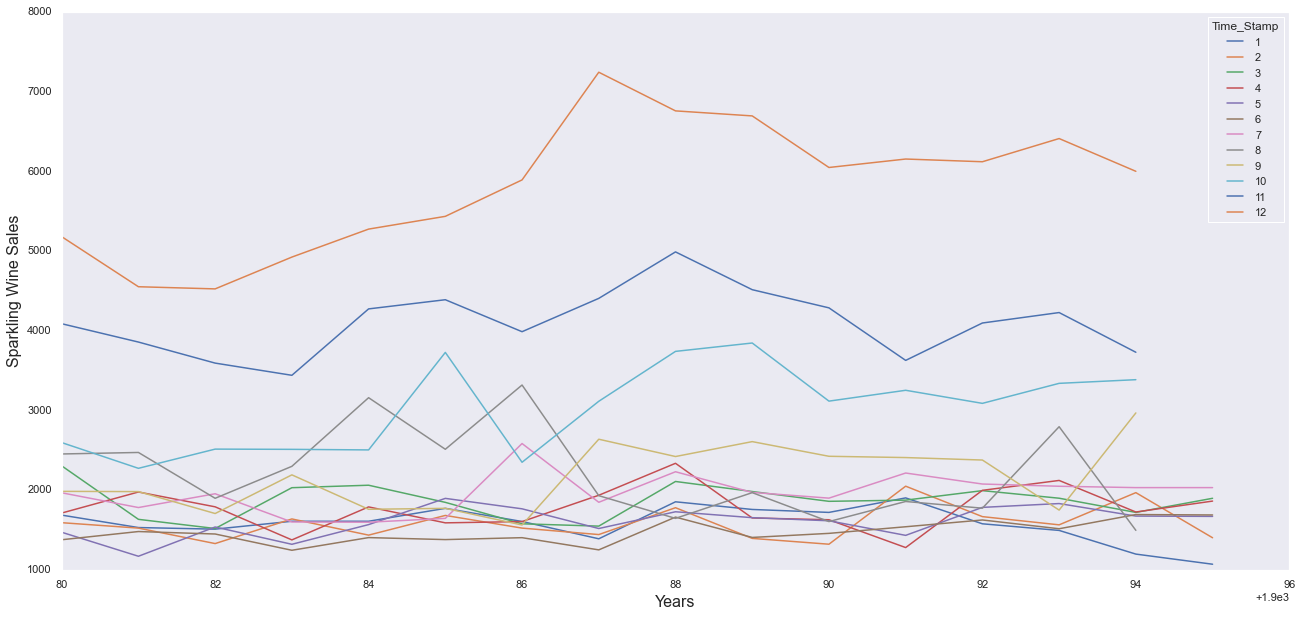

In [27]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
ax.set_xlabel('Years', fontsize = 16)
ax.set_ylabel('Sparkling Wine Sales', fontsize = 16)
plt.grid();

<span class="burk">Note</span>

This plot gives us information about the monthly trend across the years.Here in this plot every line is a month tells us about the sales of Sparkling Wines of each month across the year.This is way to show year on year monthly trend.

<span class="mark">Insights</span>

* From the above plot we clearly infer that December month have highest sales of Sparking Wine.

* June month have the lowest sales of the Sparkling Wine.

##### Decomposition of the Time Series

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

###### Additive Decomposition Model 

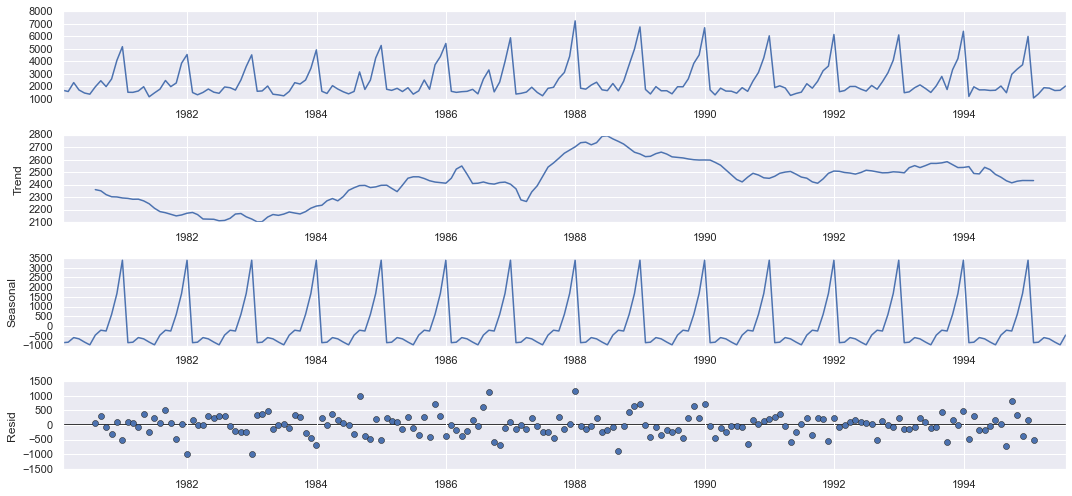

In [29]:
decomposition= seasonal_decompose(df,model='additive')
decomposition.plot();

<span class="mark">Insights</span>

* As per the 'Additive' Decomposition Model, we see that there is a pronounced trend in the earlier years of the data. There is a seasonality as well.

* Errors are not randomly distributed ,showing some kind of pattern , as we noticed that errors increases as year increases after 1985 onwards errors are high , which is not a good which is errors are not random.

* We see that the residuals are located around 0 from the plot of the residuals in the decomposition.

* Even the peaks of the original time series is not constant having change in the values.

###### Values for Trend , Seasonality & Residuals of Additive Decomposition Model

In [30]:
trend= decomposition.trend
seasonality= decomposition.seasonal
residual= decomposition.resid

In [31]:
print('Trend','\n',trend.head(24),'\n')
print('Seasonality','\n',seasonality.head(24),'\n')
print('Residual','\n',residual.head(24),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
1981-01-31    2290.375000
1981-02-28    2283.458333
1981-03-31    2284.125000
1981-04-30    2270.541667
1981-05-31    2247.500000
1981-06-30    2211.750000
1981-07-31    2184.750000
1981-08-31    2175.833333
1981-09-30    2162.958333
1981-10-31    2150.416667
1981-11-30    2157.958333
1981-12-31    2171.958333
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    33

###### Multiplicative Decomposition Model

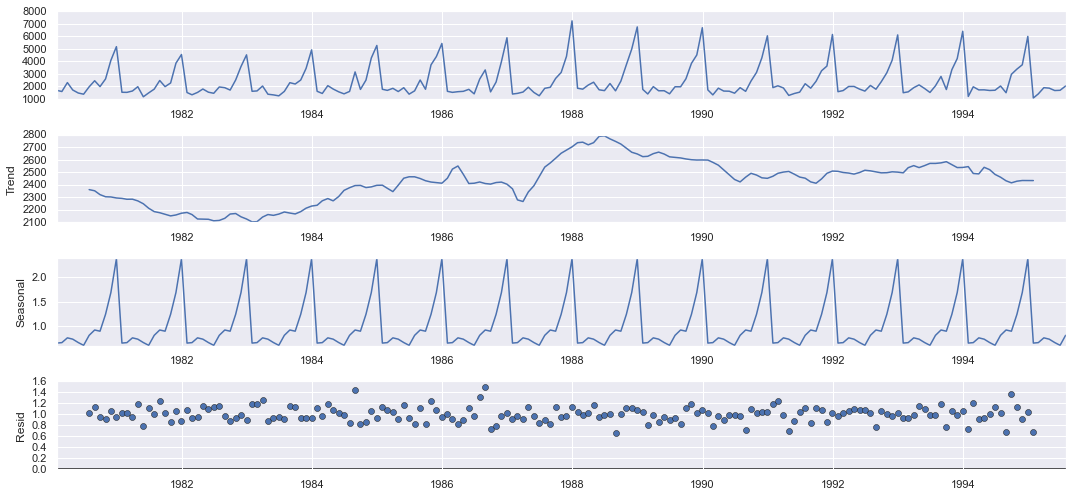

In [32]:
decomposition= seasonal_decompose(df,model='multiplicative')
decomposition.plot();

<span class="mark">Insights</span>

* As per the 'Multiplicative' Decomposition Model, we see that there is a pronounced trend in the earlier years of the data. There is a seasonality as well.

* For the multiplicative series, we see that a lot of residuals are located around 1.

###### Values for Trend , Seasonality & Residuals of Multplicative Decomposition Model

In [33]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

#### 3. Split the data into training and test. The test data should start in 1991.

##### Spliting of the data into Train and Test.

<span class="burk">Note</span>

Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [34]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

##### Checking the Records of the Train & Test Data.

In [35]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [36]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling Wine Sales
Time_Stamp                      
1980-01-31                  1686
1980-02-29                  1591
1980-03-31                  2304
1980-04-30                  1712
1980-05-31                  1471

Last few rows of Training Data


Sparkling Wine Sales
Time_Stamp                      
1990-08-31                  1605
1990-09-30                  2424
1990-10-31                  3116
1990-11-30                  4286
1990-12-31                  6047

First few rows of Test Data


Sparkling Wine Sales
Time_Stamp                      
1991-01-31                  1902
1991-02-28                  2049
1991-03-31                  1874
1991-04-30                  1279
1991-05-31                  1432

Last few rows of Test Data


Sparkling Wine Sales
Time_Stamp                      
1995-03-31                  1897
1995-04-30                  1862
1995-05-31                  1670
1995-06-30                  1688
1995-07-31                  2031

In [37]:
test.count()

Sparkling Wine Sales    55
dtype: int64

##### Checking the Shape of the Train & Test Data.

<span class="burk">Note</span>

Shape attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data.

In [38]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [39]:
shape_train = [['No. of Rows', 'No. of Columns'],
        [132 , 1]]
table = ff.create_table(shape_train)
table
      

In [40]:
shape_test = [['No. of Rows', 'No. of Columns'],
        [55 , 1]]
table = ff.create_table(shape_test)
table
      

##### Plot of Train & Test Data.

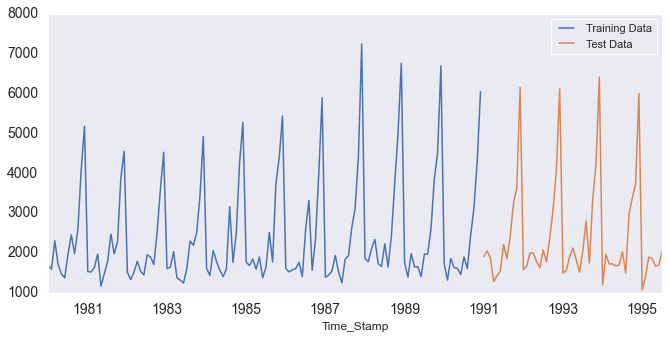

In [41]:
train['Sparkling Wine Sales'].plot(figsize=(11,5), fontsize=14)
test['Sparkling Wine Sales'].plot(figsize=(11,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

<span class="mark">Insights</span>

* Blue color represents the train data ,training Data is till the end of 1990.

* Orange color represents the test data ,test Data is from the beginning of 1991 to the last time stamp provided.

#### 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

##### Model 1: Linear Regression

<span class="burk">Note</span>

For this particular linear regression, we are going to regress the 'Sparkling Wine Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [42]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


<span class="burk">Note</span>

We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [43]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [44]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling Wine Sales  time
Time_Stamp                            
1980-01-31                  1686     1
1980-02-29                  1591     2
1980-03-31                  2304     3
1980-04-30                  1712     4
1980-05-31                  1471     5 

Last few rows of Training Data 
             Sparkling Wine Sales  time
Time_Stamp                            
1990-08-31                  1605   128
1990-09-30                  2424   129
1990-10-31                  3116   130
1990-11-30                  4286   131
1990-12-31                  6047   132 

First few rows of Test Data 
             Sparkling Wine Sales  time
Time_Stamp                            
1991-01-31                  1902   133
1991-02-28                  2049   134
1991-03-31                  1874   135
1991-04-30                  1279   136
1991-05-31                  1432   137 

Last few rows of Test Data 
             Sparkling Wine Sales  time
Time_Stamp

<span class="burk">Note</span>

Now that our training and test data has been modified, let us go ahead use Linear Regression to build the model on the training data and test the model on the test data.

###### Building Linear Regression Model

In [45]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [46]:
lr.fit(LinearRegression_train[['time']], LinearRegression_train['Sparkling Wine Sales'].values)

LinearRegression()

In [47]:
LinearRegression_train['Sparkling Wine Sales'].values

array([1686, 1591, 2304, 1712, 1471, 1377, 1966, 2453, 1984, 2596, 4087,
       5179, 1530, 1523, 1633, 1976, 1170, 1480, 1781, 2472, 1981, 2273,
       3857, 4551, 1510, 1329, 1518, 1790, 1537, 1449, 1954, 1897, 1706,
       2514, 3593, 4524, 1609, 1638, 2030, 1375, 1320, 1245, 1600, 2298,
       2191, 2511, 3440, 4923, 1609, 1435, 2061, 1789, 1567, 1404, 1597,
       3159, 1759, 2504, 4273, 5274, 1771, 1682, 1846, 1589, 1896, 1379,
       1645, 2512, 1771, 3727, 4388, 5434, 1606, 1523, 1577, 1605, 1765,
       1403, 2584, 3318, 1562, 2349, 3987, 5891, 1389, 1442, 1548, 1935,
       1518, 1250, 1847, 1930, 2638, 3114, 4405, 7242, 1853, 1779, 2108,
       2336, 1728, 1661, 2230, 1645, 2421, 3740, 4988, 6757, 1757, 1394,
       1982, 1650, 1654, 1406, 1971, 1968, 2608, 3845, 4514, 6694, 1720,
       1321, 1859, 1628, 1615, 1457, 1899, 1605, 2424, 3116, 4286, 6047])

###### Prediction on Test Dataset

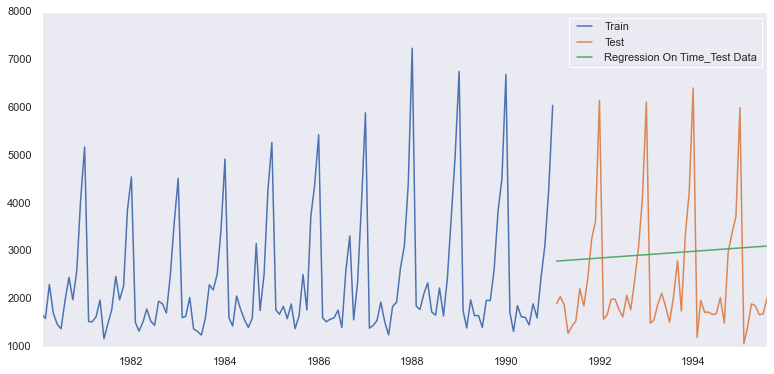

In [48]:
test_prediction_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime']= test_prediction_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling Wine Sales'], label='Train')
plt.plot(test['Sparkling Wine Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

<span class="girk">Observation</span>

Here we get a linear line  following the previous patterns.

###### Model Evaluation Linear Regression 

In [49]:
from sklearn import metrics

**Test Data - RMSE**

In [50]:
rmse_model1_test= metrics.mean_squared_error(test['Sparkling Wine Sales'],test_prediction_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [51]:
model_results_df_1 = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Regression On Time'])
model_results_df_1

Test RMSE
Regression On Time  1389.135175

##### Model 2: Naive Model , { Navie Approach:  ^yt+1=yt }

<span class="burk">Note</span>

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

###### Building Navie Model

In [52]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [53]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling Wine Sales'])[len(np.asarray(train['Sparkling Wine Sales']))-1]
NaiveModel_test['naive'].head(12)

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
1991-06-30    6047
1991-07-31    6047
1991-08-31    6047
1991-09-30    6047
1991-10-31    6047
1991-11-30    6047
1991-12-31    6047
Name: naive, dtype: int64

###### Prediction on Test Dataset

In [54]:
NaiveModel_test.head()

Sparkling Wine Sales  naive
Time_Stamp                             
1991-01-31                  1902   6047
1991-02-28                  2049   6047
1991-03-31                  1874   6047
1991-04-30                  1279   6047
1991-05-31                  1432   6047

<span class="girk">Observation</span> 

We get the same value of Navie forecast for the entire test data.

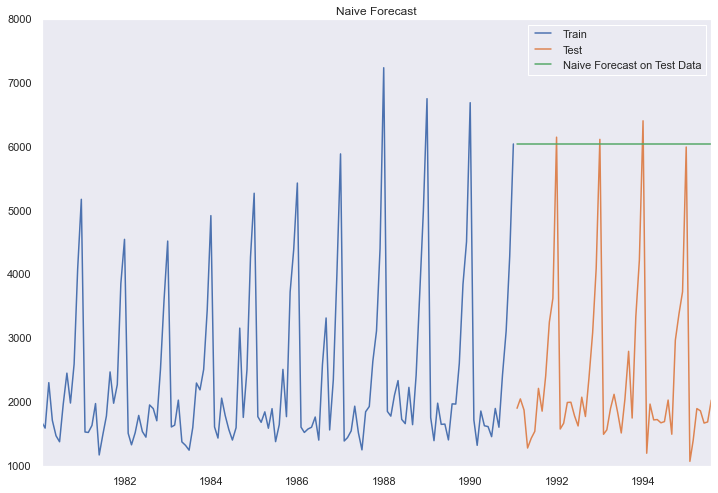

In [55]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling Wine Sales'], label='Train')
plt.plot(test['Sparkling Wine Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

<span class="girk">Observation</span>

The last observation of the train data is constructed the forecast for entire test data.That's why we are seeing a straight line here. i.e. The Sparkling Wine Sales will be like the recent past.

###### Model Evaluation Navie

**Test Data - RMSE**

In [56]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling Wine Sales'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))


For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [57]:
model_results_df_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])

Model_Results_Df = pd.concat([model_results_df_1, model_results_df_2])
Model_Results_Df

Test RMSE
Regression On Time  1389.135175
Naive Model         3864.279352

##### Model 3 : Simple Average Model

<span class="burk">Note</span> 

For this particular simple average method, we will forecast by using the average of the training values.

###### Building Simple Average Model

In [58]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [59]:
SimpleAverage_test['mean_forecast']= train['Sparkling Wine Sales'].mean()
SimpleAverage_test.head()

Sparkling Wine Sales  mean_forecast
Time_Stamp                                     
1991-01-31                  1902    2403.780303
1991-02-28                  2049    2403.780303
1991-03-31                  1874    2403.780303
1991-04-30                  1279    2403.780303
1991-05-31                  1432    2403.780303

###### Prediction on Test Dataset.

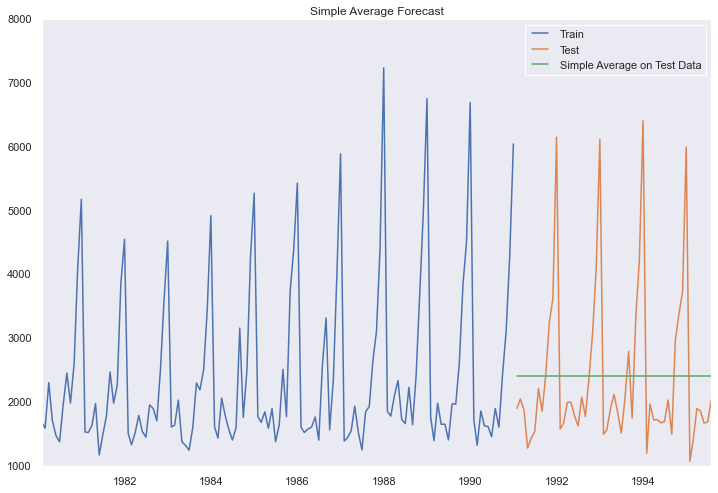

In [60]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling Wine Sales'], label='Train')
plt.plot(SimpleAverage_test['Sparkling Wine Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

###### Model Evaluation Simple Average

**Test Data - RMSE**

In [61]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling Wine Sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [62]:
model_results_df_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])

Model_Results_Df = pd.concat([Model_Results_Df, model_results_df_3 ])
Model_Results_Df

Test RMSE
Regression On Time    1389.135175
Naive Model           3864.279352
Simple Average Model  1275.081804

##### Model 4 : Moving Average(MA)

<span class="burk">Note</span>

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### Building Moving Average Model

In [63]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling Wine Sales
Time_Stamp                      
1980-01-31                  1686
1980-02-29                  1591
1980-03-31                  2304
1980-04-30                  1712
1980-05-31                  1471

**Trailing moving averages**

In [64]:
MovingAverage['Trailing_2']= MovingAverage['Sparkling Wine Sales'].rolling(2).mean()
MovingAverage['Trailing_4']= MovingAverage['Sparkling Wine Sales'].rolling(4).mean()
MovingAverage['Trailing_6']= MovingAverage['Sparkling Wine Sales'].rolling(6).mean()
MovingAverage['Trailing_9']= MovingAverage['Sparkling Wine Sales'].rolling(9).mean()

MovingAverage.head()

Sparkling Wine Sales  Trailing_2  Trailing_4  Trailing_6  \
Time_Stamp                                                             
1980-01-31                  1686         NaN         NaN         NaN   
1980-02-29                  1591      1638.5         NaN         NaN   
1980-03-31                  2304      1947.5         NaN         NaN   
1980-04-30                  1712      2008.0     1823.25         NaN   
1980-05-31                  1471      1591.5     1769.50         NaN   

            Trailing_9  
Time_Stamp              
1980-01-31         NaN  
1980-02-29         NaN  
1980-03-31         NaN  
1980-04-30         NaN  
1980-05-31         NaN

**Plotting of the Whole Data With Moving Average**

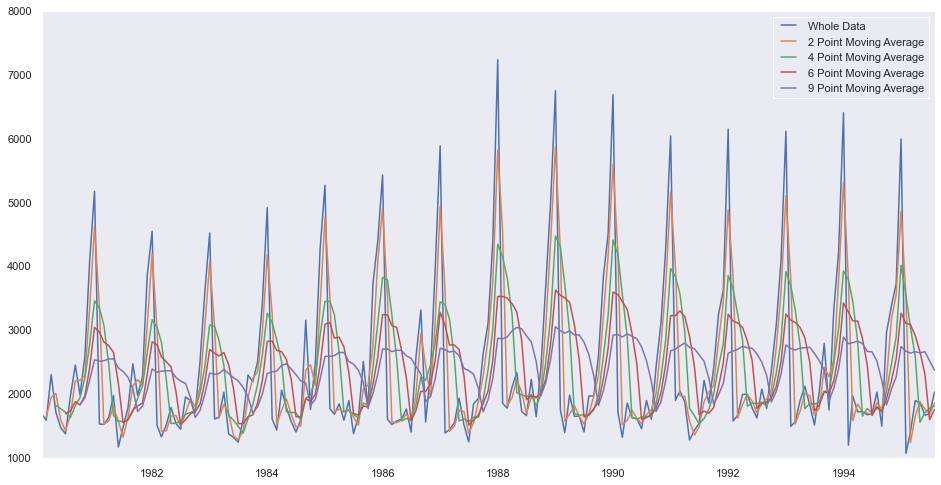

In [65]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling Wine Sales'], label='Whole Data')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

<span class="girk">Observation</span>

2 Point Moving Average curve is copying the original data as it is replicating the original data.

<span class="burk">Note</span>

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

**Creating Train and Test Set For Moving Average Model**

In [66]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

###### Plotting on both the Training and Test data

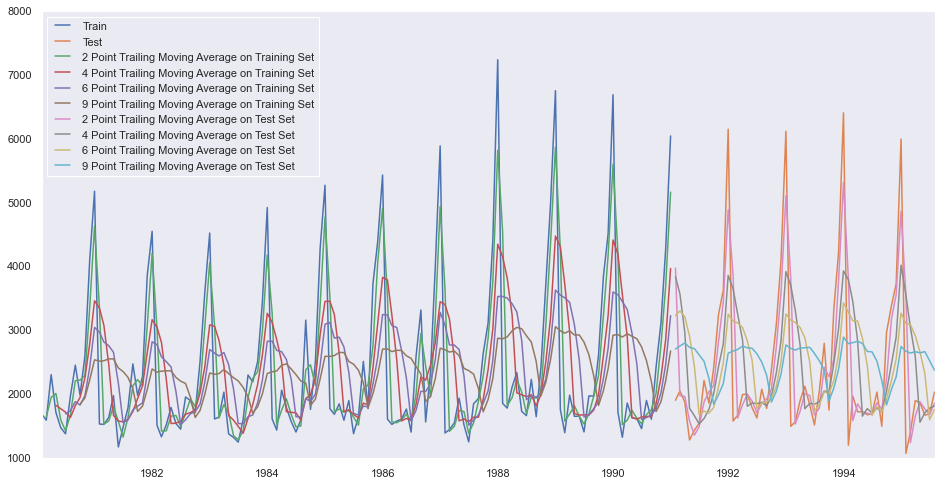

In [67]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling Wine Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling Wine Sales'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

###### Model Evaluation Moving Average

<span class="burk">Note</span>

Done only on the Test Data.

**Test Data - RMSE With Moving Averages**

In [68]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling Wine Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling Wine Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling Wine Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling Wine Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 1346.278 


<span class="girk">Observation</span> 

RMSE of the 2 Point Moving Average Model is the least - 813.401 among the 4 , 6 , 9 Point Moving Average Model.

In [69]:
model_results_df_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2 Point Trailing Moving Average','4 Point Trailing Moving Average'
                                   ,'6 PointTrailing Moving Average','9 PointTrailing Moving Average'])

Model_Results_Df = pd.concat([Model_Results_Df, model_results_df_4])
Model_Results_Df

Test RMSE
Regression On Time               1389.135175
Naive Model                      3864.279352
Simple Average Model             1275.081804
2 Point Trailing Moving Average   813.400684
4 Point Trailing Moving Average  1156.589694
6 PointTrailing Moving Average   1283.927428
9 PointTrailing Moving Average   1346.278315

##### Model 5 : Simple Exponential Smoothing Model

###### Building Simple Exponential Smoothing Model

In [70]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from warnings import filterwarnings
filterwarnings("ignore")

In [71]:
SES_train = train.copy()
SES_test = test.copy()

In [72]:
model_SES= SimpleExpSmoothing(SES_train['Sparkling Wine Sales'])

In [73]:
model_SES_autofit= model_SES.fit(optimized=True) #autofit method

In [74]:
model_SES_autofit.params

{'smoothing_level': 0.049606598807459296,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047538435304,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

###### Prediction on Test Dataset.

In [75]:
SES_test['predict']= model_SES_autofit.forecast(steps= len(test))
SES_test.head()

Sparkling Wine Sales      predict
Time_Stamp                                   
1991-01-31                  1902  2724.929339
1991-02-28                  2049  2724.929339
1991-03-31                  1874  2724.929339
1991-04-30                  1279  2724.929339
1991-05-31                  1432  2724.929339

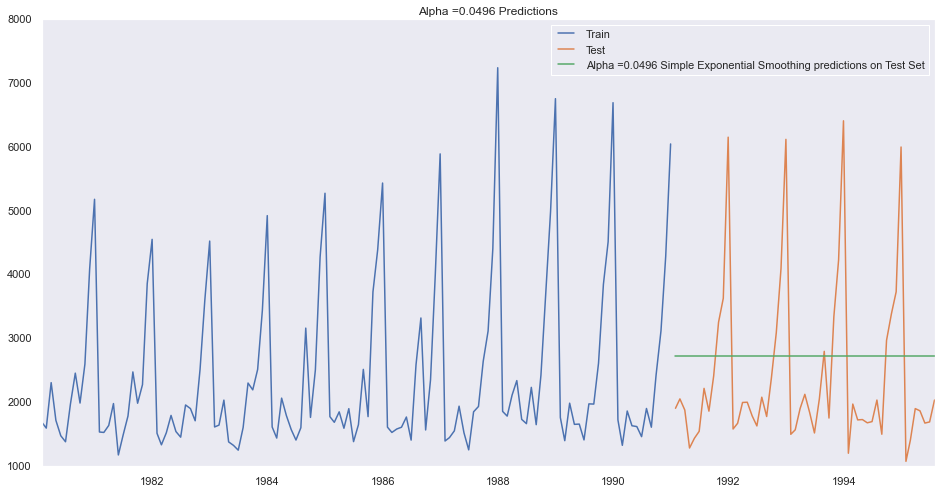

In [76]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling Wine Sales'], label='Train')
plt.plot(SES_test['Sparkling Wine Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0496 Predictions');

###### Model Evaluation for α= 0.0496 : Simple Exponential Smoothing

**Test Data - RMSE**

In [77]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling Wine Sales'],SES_test['predict'],squared=False)
print("For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [78]:
model_results_df_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.0496,Simple Exponential Smoothing'])

Model_Results_Df = pd.concat([Model_Results_Df, model_results_df_5])
Model_Results_Df

Test RMSE
Regression On Time                         1389.135175
Naive Model                                3864.279352
Simple Average Model                       1275.081804
2 Point Trailing Moving Average             813.400684
4 Point Trailing Moving Average            1156.589694
6 PointTrailing Moving Average             1283.927428
9 PointTrailing Moving Average             1346.278315
Alpha=0.0496,Simple Exponential Smoothing  1316.034674

###### Setting different alpha values - Brute Force Method

<span class="burk">Note</span> 

Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.

We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [79]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_ses = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_ses

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [80]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling Wine Sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling Wine Sales'],SES_test['predict',i],squared=False)
    
    resultsDf_ses = resultsDf_ses.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

###### Model Evaluation

In [81]:
resultsDf_ses.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values   Train RMSE    Test RMSE
0           0.3  1359.511747  1935.507132
1           0.4  1352.588879  2311.919615
2           0.5  1344.004369  2666.351413
3           0.6  1338.805381  2979.204388
4           0.7  1338.844308  3249.944092
5           0.8  1344.462091  3483.801006
6           0.9  1355.723518  3686.794285

<span class="mark">Insights</span>

Here after comparing different alpha values we get the least RMSE on Test data at alpha=0.3.So, we can take alpha=0.3 for the model.

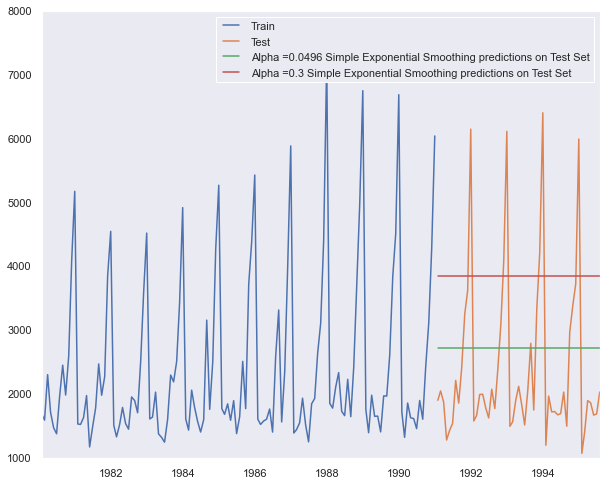

In [82]:
## Plotting on both the Training and Test data

plt.figure(figsize=(10,8))
plt.plot(SES_train['Sparkling Wine Sales'], label='Train')
plt.plot(SES_test['Sparkling Wine Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

###### Test Data - RMSE With Alpha = 0.3

In [83]:
model_resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_ses.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.3,Simple Exponential Smoothing'])

Model_Results_Df = pd.concat([Model_Results_Df, model_resultsDf_6_1])
Model_Results_Df

Test RMSE
Regression On Time                         1389.135175
Naive Model                                3864.279352
Simple Average Model                       1275.081804
2 Point Trailing Moving Average             813.400684
4 Point Trailing Moving Average            1156.589694
6 PointTrailing Moving Average             1283.927428
9 PointTrailing Moving Average             1346.278315
Alpha=0.0496,Simple Exponential Smoothing  1316.034674
Alpha=0.3,Simple Exponential Smoothing     1935.507132

##### Model 6 :  Double Exponential Smoothing (Holt's Model)

<span class="burk">Note</span>

Two parameters α and β are estimated in this model. Level and Trend are accounted for in this model.    
    
    

###### Building Double Exponential Smoothing Model (Holt's Model)

In [84]:
DES_train = train.copy()
DES_test = test.copy()

In [85]:
model_DES = Holt(DES_train['Sparkling Wine Sales'])

###### Setting different alpha  & beta values -Brute Force Method

In [86]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_des = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_des

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [87]:
for i in np.arange(0.3, 1.1, 0.1):
    for j in np.arange(0.3, 1.1, 0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,
                                            smoothing_trend=j,
                                            optimized=False,
                                            use_brute=True)
        DES_train['predict', i, j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict', i, j] = model_DES_alpha_i_j.forecast(steps=55)

        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling Wine Sales'],
                                                       DES_train['predict', i,
                                                                 j],
                                                       squared=False)

        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling Wine Sales'],
                                                      DES_test['predict', i,
                                                               j],
                                                      squared=False)

        resultsDf_des = resultsDf_des.append(
            {
                'Alpha Values': i,
                'Beta Values': j,
                'Train RMSE': rmse_model6_train,
                'Test RMSE': rmse_model6_test
            },
            ignore_index=True)

In [88]:
 resultsDf_des

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.3          0.3  1592.292788  18259.110704
1            0.3          0.4  1682.573828  26069.841401
2            0.3          0.5  1771.710791  34401.512440
3            0.3          0.6  1848.576510  42162.748095
4            0.3          0.7  1899.949006  47832.397419
..           ...          ...          ...           ...
59           1.0          0.6  1753.402326  49327.087977
60           1.0          0.7  1825.187155  52655.765663
61           1.0          0.8  1902.013709  55442.273880
62           1.0          0.9  1985.368445  57823.177011
63           1.0          1.0  2077.672157  59877.076519

[64 rows x 4 columns]

**Let us sort the data frame in the ascending ordering of the 'Test RMSE'**

In [89]:
resultsDf_des.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.3          0.3  1592.292788  18259.110704
8            0.4          0.3  1569.338606  23878.496940
1            0.3          0.4  1682.573828  26069.841401
16           0.5          0.3  1530.575845  27095.532414
24           0.6          0.3  1506.449870  29070.722592

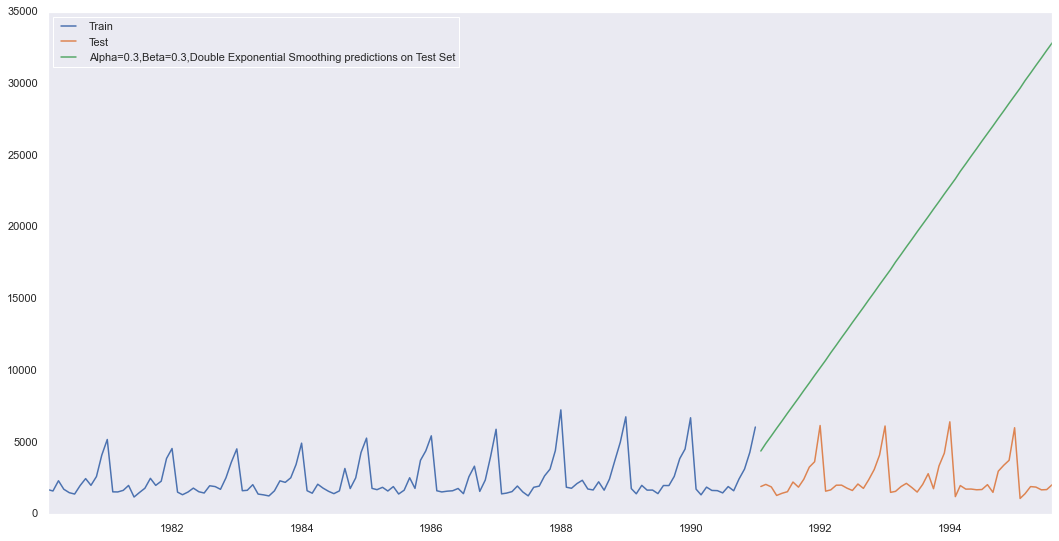

In [90]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling Wine Sales'], label='Train')
plt.plot(DES_test['Sparkling Wine Sales'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Double Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

###### Test Data - RMSE With Alpha = 0.3 & Beta = 0.3

In [91]:
model_resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_des.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

Model_Results_Df = pd.concat([Model_Results_Df, model_resultsDf_7_1])
Model_Results_Df

Test RMSE
Regression On Time                              1389.135175
Naive Model                                     3864.279352
Simple Average Model                            1275.081804
2 Point Trailing Moving Average                  813.400684
4 Point Trailing Moving Average                 1156.589694
6 PointTrailing Moving Average                  1283.927428
9 PointTrailing Moving Average                  1346.278315
Alpha=0.0496,Simple Exponential Smoothing       1316.034674
Alpha=0.3,Simple Exponential Smoothing          1935.507132
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing  18259.110704

##### Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

<span class="burk">Note</span>

Three parameters α,β and γ are estimated in this model.Level, Trend and Seasonality are accounted for in this model.

###### Building Triple Exponential Smoothing Model (Holt's Winter Model)

In [92]:
TES_train = train.copy()
TES_test = test.copy()

In [93]:
model_TES = ExponentialSmoothing(TES_train['Sparkling Wine Sales'],trend='additive',seasonal='multiplicative',freq='M')

In [94]:
model_TES_autofit = model_TES.fit() #autofit Method

In [95]:
model_TES_autofit.params

{'smoothing_level': 0.11107193639676448,
 'smoothing_trend': 0.06170661554551025,
 'smoothing_seasonal': 0.39507938025204126,
 'damping_trend': nan,
 'initial_level': 1640.0001849429073,
 'initial_trend': -15.111380527844805,
 'initial_seasons': array([1.03314765, 0.98921937, 1.40520416, 1.20124958, 0.93920975,
        0.95169819, 1.29579418, 1.68037583, 1.35792845, 1.79419758,
        2.82688557, 3.60017043]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [96]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Sparkling Wine Sales  auto_predict
Time_Stamp                                    
1991-01-31                  1902   1577.246443
1991-02-28                  2049   1333.624267
1991-03-31                  1874   1746.041391
1991-04-30                  1279   1630.569083
1991-05-31                  1432   1523.309244

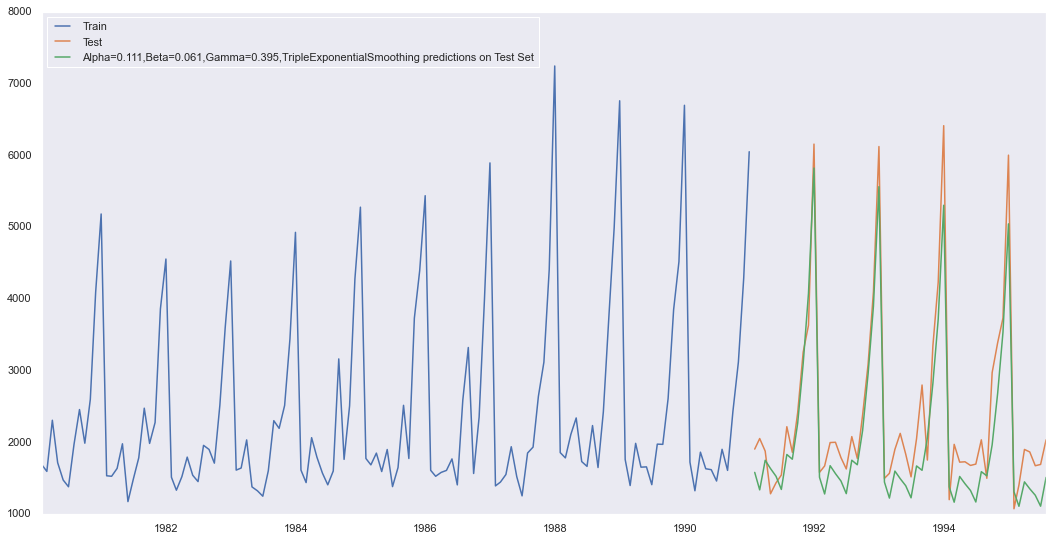

In [97]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling Wine Sales'], label='Train')
plt.plot(TES_test['Sparkling Wine Sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [98]:
rmse_model6_test_1_tes = metrics.mean_squared_error(TES_test['Sparkling Wine Sales'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.111,Beta=0.061,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1_tes))

For Alpha=0.111,Beta=0.061,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 469.592


In [99]:
model_resultsDf_8_1_tes = pd.DataFrame({'Test RMSE': [rmse_model6_test_1_tes]}
                           ,index=['Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExponentialSmoothing'])

Model_Results_Df = pd.concat([Model_Results_Df, model_resultsDf_8_1_tes])
Model_Results_Df

Test RMSE
Regression On Time                                   1389.135175
Naive Model                                          3864.279352
Simple Average Model                                 1275.081804
2 Point Trailing Moving Average                       813.400684
4 Point Trailing Moving Average                      1156.589694
6 PointTrailing Moving Average                       1283.927428
9 PointTrailing Moving Average                       1346.278315
Alpha=0.0496,Simple Exponential Smoothing            1316.034674
Alpha=0.3,Simple Exponential Smoothing               1935.507132
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...    469.591666

###### Setting different alpha , beta & gamma values

In [100]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_tes = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_tes

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [101]:
for i in np.arange(0.3, 1.1, 0.1):
    for j in np.arange(0.3, 1.1, 0.1):
        for k in np.arange(0.3, 1.1, 0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,
                                                  smoothing_trend=j,
                                                  smoothing_seasonal=k,
                                                  optimized=False,
                                                  use_brute=True)
            TES_train['predict', i, j, k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict', i, j,
                     k] = model_TES_alpha_i_j_k.forecast(steps=55)

            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling Wine Sales'],
                                                           TES_train['predict',
                                                                     i, j, k],
                                                           squared=False)

            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling Wine Sales'],
                                                          TES_test['predict',
                                                                   i, j, k],
                                                          squared=False)

            resultsDf_tes = resultsDf_tes.append(
                {
                    'Alpha Values': i,
                    'Beta Values': j,
                    'Gamma Values': k,
                    'Train RMSE': rmse_model8_train,
                    'Test RMSE': rmse_model8_test
                },
                ignore_index=True)

In [102]:
resultsDf_tes

Alpha Values  Beta Values  Gamma Values     Train RMSE     Test RMSE
0             0.3          0.3           0.3     404.513320  3.927862e+02
1             0.3          0.3           0.4     402.088628  9.513202e+02
2             0.3          0.3           0.5     408.282432  1.470487e+03
3             0.3          0.3           0.6     428.631668  2.181724e+03
4             0.3          0.3           0.7     468.958530  3.513351e+03
..            ...          ...           ...            ...           ...
507           1.0          1.0           0.6  153394.791826  7.989790e+05
508           1.0          1.0           0.7   94040.964958  1.074413e+06
509           1.0          1.0           0.8  102196.953755  5.010607e+06
510           1.0          1.0           0.9   77924.294413  4.318265e+05
511           1.0          1.0           1.0  239917.432847  1.254280e+05

[512 rows x 5 columns]

In [103]:
resultsDf_tes.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
0             0.3          0.3           0.3  404.513320  392.786198
8             0.3          0.4           0.3  424.828055  410.854547
65            0.4          0.3           0.4  435.553595  421.409170
296           0.7          0.8           0.3  700.317756  518.188752
130           0.5          0.3           0.5  498.239915  542.175497

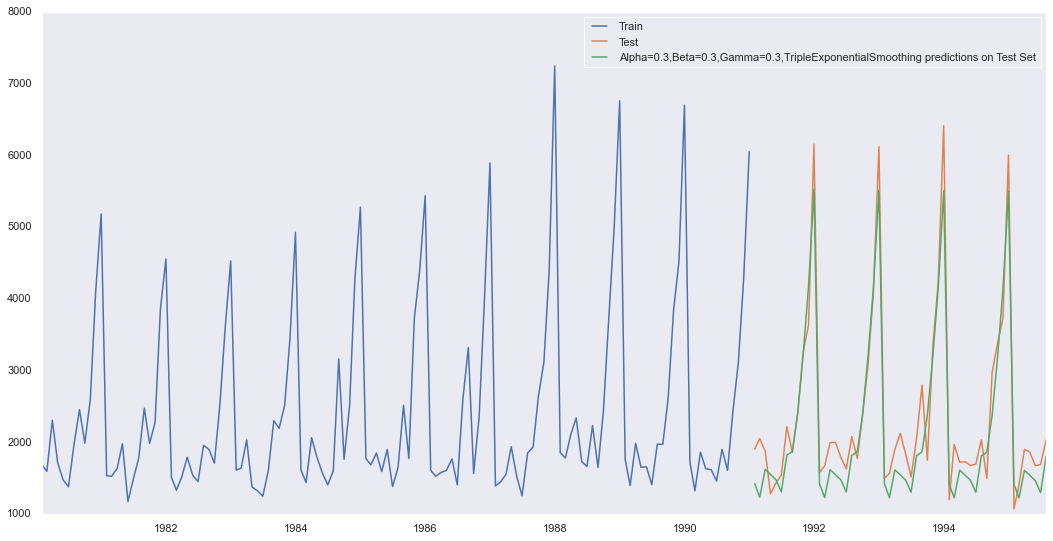

In [104]:
plt.figure(figsize=(18, 9))
plt.plot(TES_train['Sparkling Wine Sales'], label='Train')
plt.plot(TES_test['Sparkling Wine Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(
    TES_test['predict', 0.3, 0.3, 0.3],
    label=
    'Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set'
)

plt.legend(loc='best')
plt.grid()

In [105]:
model_resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_tes.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])

Model_Results_Df = pd.concat([Model_Results_Df, model_resultsDf_8_3])
Model_Results_Df

Test RMSE
Regression On Time                                   1389.135175
Naive Model                                          3864.279352
Simple Average Model                                 1275.081804
2 Point Trailing Moving Average                       813.400684
4 Point Trailing Moving Average                      1156.589694
6 PointTrailing Moving Average                       1283.927428
9 PointTrailing Moving Average                       1346.278315
Alpha=0.0496,Simple Exponential Smoothing            1316.034674
Alpha=0.3,Simple Exponential Smoothing               1935.507132
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...    469.591666
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    392.786198

#### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

##### Check for stationarity of the whole Time Series data. - Dickey-Fuller test

In [106]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=12).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

In [107]:
print(adfuller(df['Sparkling Wine Sales'], autolag='AIC'))

(-1.3604974548123334, 0.601060887163487, 11, 175, {'1%': -3.4682803641749267, '5%': -2.8782017240816327, '10%': -2.5756525795918366}, 2573.1222090270685)


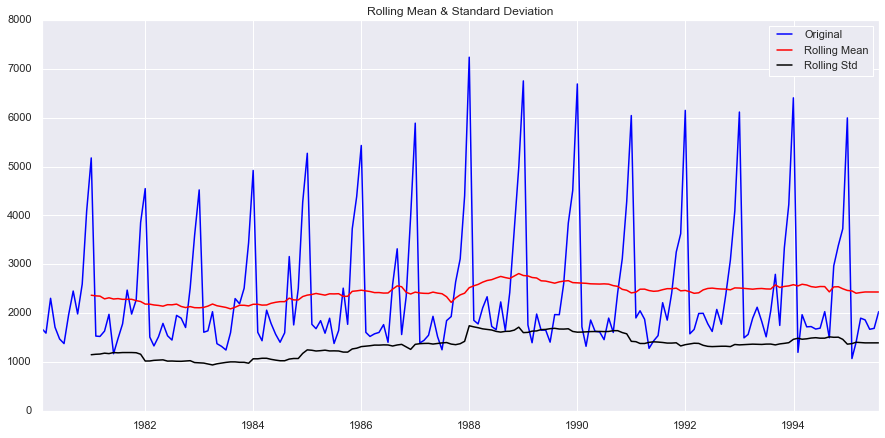

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [108]:
test_stationarity(df['Sparkling Wine Sales'])

<span class="burk">Conclusion :</span>

As we know that in Dickey-Fuller Test :
    H:0 = The series is non-stationary.
    H:A = The series is stationary.   

On comparing the p-value , we found p-value is greater than the 5% significant level ,hence we fail to reject the null hypothesis & reached on the conclusion that he Time Series is non-stationary.

##### Let us take a difference of order 1 and check whether the Time Series is stationary or not.

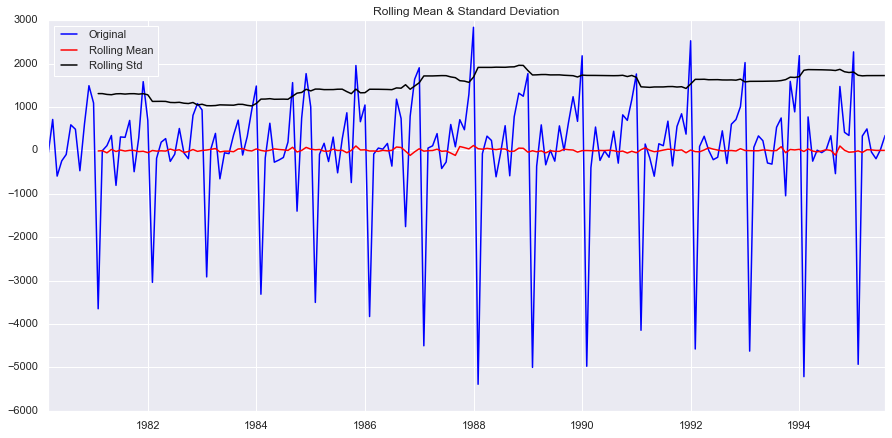

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [109]:
test_stationarity(df['Sparkling Wine Sales'].diff().dropna())


<span class="burk">Conclusion :</span>

As we know that in Dickey-Fuller Test :
    H:0 = The series is non-stationary.
    H:A = The series is stationary.   

On comparing the p-value , we found p-value is less than the 5% significant level ,hence we reject the null hypothesis & reached on the conclusion that he Time Series is stationary with difference of order 1.We see that at α = 0.05 the Time Series is indeed stationary.

#### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

##### Automated version of an ARIMA model with the lowest Akaike Information Criteria (AIC).

###### Checking the Stationarity of the Train Data 

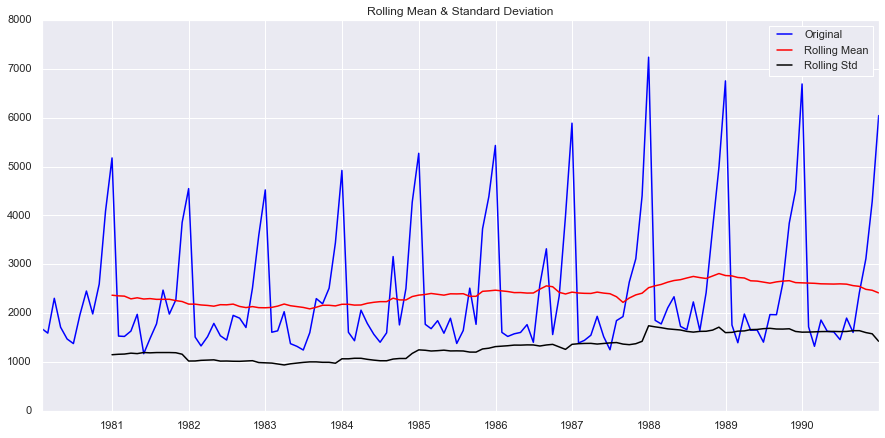

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [110]:
test_stationarity(train['Sparkling Wine Sales'])

<span class="girk">Conclusion</span> 

We see that the series is not stationary at α = 0.05.

###### Let us take a difference of order 1 and check whether the Train Time Series is stationary or not.

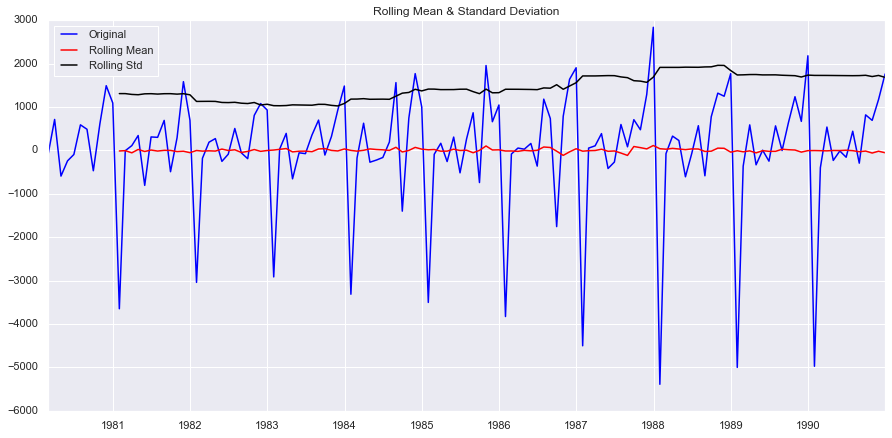

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [111]:
test_stationarity(train['Sparkling Wine Sales'].diff().dropna())

<span class="girk">Conclusion</span> 

We see that after taking a difference of order 1 the series have become stationary at 
α = 0.05.

<span class="burk">Note</span>

If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

###### Checking the Info of the Train Data

In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Sparkling Wine Sales  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


###### Checking for the combination of different parameters of p and q in the range.

Note

The data has some seasonality so ideally we should build a SARIMA model. But as per instructions we are building an ARIMA model by looking at the minimum AIC criterion.

In [113]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3) #p=0,1,2=q --- Range of Values for p and q.
d= range(1,2) #d=1----Rnage of Values for d.
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [114]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [115]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling Wine Sales'].values,
                        order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param, ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({
        'param': param,
        'AIC': ARIMA_model.aic
    },
                                 ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.9064372716052
ARIMA(0, 1, 2) - AIC:2232.783097684338
ARIMA(1, 1, 0) - AIC:2268.5280614409007
ARIMA(1, 1, 1) - AIC:2235.013945354085
ARIMA(1, 1, 2) - AIC:2233.5976471202684
ARIMA(2, 1, 0) - AIC:2262.0356009540687
ARIMA(2, 1, 1) - AIC:2232.360489902149
ARIMA(2, 1, 2) - AIC:2210.6215751505047


In [116]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2210.621575
7  (2, 1, 1)  2232.360490
2  (0, 1, 2)  2232.783098
5  (1, 1, 2)  2233.597647
4  (1, 1, 1)  2235.013945
6  (2, 1, 0)  2262.035601
1  (0, 1, 1)  2264.906437
3  (1, 1, 0)  2268.528061
0  (0, 1, 0)  2269.582796

###### Building Automated version of an ARIMA model with the lowest Akaike Information Criteria (AIC).

In [117]:
auto_ARIMA = ARIMA(train['Sparkling Wine Sales'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               ARIMA Model Results                                
Dep. Variable:     D.Sparkling Wine Sales   No. Observations:                  131
Model:                     ARIMA(2, 1, 2)   Log Likelihood               -1099.311
Method:                           css-mle   S.D. of innovations           1013.266
Date:                    Mon, 20 Dec 2021   AIC                           2210.622
Time:                            17:51:36   BIC                           2227.873
Sample:                        02-29-1980   HQIC                          2217.632
                             - 12-31-1990                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            5.5850      0.518     10.774      0.000       4.569       6.601
ar.L1.D.Sparkling Wine Sales     1.2701      

<span class="girk">Conclusion</span> 

By looking the ARIMA model summary we found that the p-values of all the components of the ARIMA model are significant.Hence the value which we get for p,d & q  from lowest AIC are significant.

###### Predict on the Test Set using this Model and Evaluate the model (RMSE).

In [118]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [119]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling Wine Sales'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1374.3364852048092


In [120]:
model_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Auto_ARIMA(2,1,2)'])

model_resultsDf

Test RMSE
Auto_ARIMA(2,1,2)  1374.336485

##### Automated version of the SARIMA model with the lowest Akaike Information Criteria (AIC).

###### Plotting ACF plot to understand the seasonal parameter for the SARIMA model.

<span class="burk">Note</span> 

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

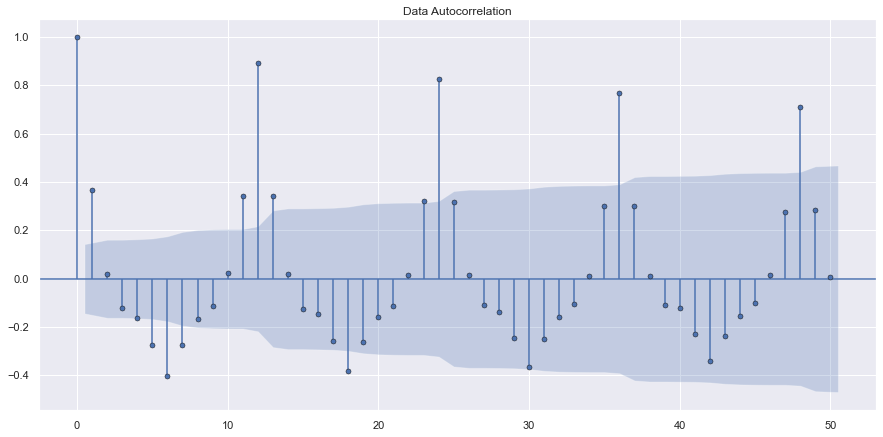

In [121]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Sparkling Wine Sales'],lags=50,title='Data Autocorrelation')
plt.show()

<span class="girk">Conclusion</span>

By looking the ACF plot we found a pattern that every 6th and 12th  lag is significant and repeating itself in the same pattern so building a SARIMA model we take seasonality of  6 as well as 12 and built the model.We see that there can be a seasonality of 6 and 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

###### Checking for the combination of different parameters of ( p d q ) and (P,D,Q) by setting the seasonality as 6 for the auto SARIMA model.

In [122]:
import itertools
p = q = range(0, 3)
d= range(1,2) 
D = range(0,1) 
P=Q=range(0,3)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))] #P,D,Q
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [123]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [124]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling Wine Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.3780761716293
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.635553688869
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.559984443132
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360123060285
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510504
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.917780565647
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.162907850584
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.56528590828
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.1876339540936
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.5732428785805
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.5174298142886
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093274791844
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.7885104424029
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.7717933280558
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.6964509718225
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC

In [125]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1727.678699
26  (0, 1, 2)  (2, 0, 2, 6)  1727.888803
80  (2, 1, 2)  (2, 0, 2, 6)  1729.363547
17  (0, 1, 1)  (2, 0, 2, 6)  1741.696451
44  (1, 1, 1)  (2, 0, 2, 6)  1743.374729

###### Building Automated version of an SARIMA model with the lowest Akaike Information Criteria (AIC).

In [126]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling Wine Sales'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.839
Date:                           Mon, 20 Dec 2021   AIC                           1727.679
Time:                                   17:52:08   BIC                           1749.707
Sample:                                        0   HQIC                          1736.621
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6449      0.286     -2.257      0.024      -1.205      -0.085
ma.L1         -0.1068      0.250     -0.428

<span class="girk">Conclusion</span> 

By looking the SARIMA model summary we found that the p-values of the components like - ma.L1 , ar.S.L6 and ma.S.L6   of the SARIMA model are more than 0.05.

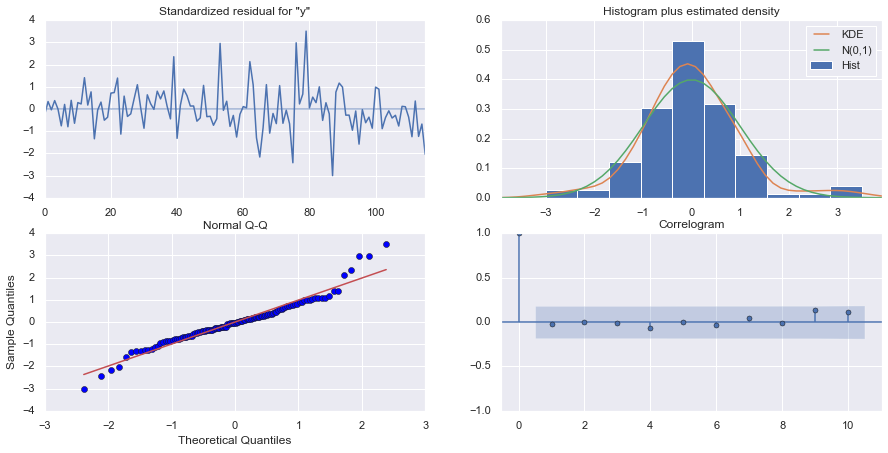

In [127]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

<div class="mark">Insights </div><i class="fa fa-lightbulb "></i>

* Form Standardize residual for "Y" we infer that is no pattern found in the error part.

* By looking at the diagnostics plots like (  Histogram and Normal Q-Q ) we infer that errors are almost normally distributed.

* From correlogram we infer that correlation coff. of error terms is zero and we can seee that none of the errors are significant.(i.e No error term crossing the cut-off). 

###### Predict on the Test Set using the Auto SARIMA model and Evaluate the model.

In [128]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [129]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1330.386482  380.571295     584.480451    2076.292513
1  1177.274343  392.122746     408.727883    1945.820802
2  1625.927381  392.316725     857.000729    2394.854033
3  1546.300445  397.717185     766.789087    2325.811804
4  1308.731674  398.936056     526.831371    2090.631977

In [130]:
rmse = mean_squared_error(test['Sparkling Wine Sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

626.9586777963591


In [131]:
auto_sarima_6_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Auto_SARIMA(1,1,2)(2,0,2,6)'])


model_resultsDf = pd.concat([model_resultsDf,auto_sarima_6_resultsDf])

model_resultsDf

Test RMSE
Auto_ARIMA(2,1,2)            1374.336485
Auto_SARIMA(1,1,2)(2,0,2,6)   626.958678

#### Checking for the combination of different parameters of ( p d q ) and (P,D,Q) by setting the seasonality as 12 for the auto SARIMA model.

In [132]:
import itertools
p = q = range(0, 3)
d= range(1,2) 
D = range(0,1) 
P=Q=range(0,3)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))] #P,D,Q
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [133]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [134]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling Wine Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616842675
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640234443
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456672
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389083
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791944
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.205415861082
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920754
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850584
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566464
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.708957284438
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838555
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193740335
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144332806
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954176164
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245084897515
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018824244179
SARIMA(0, 1, 

In [135]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.934563
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121563
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340402

In [136]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling Wine Sales'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Mon, 20 Dec 2021   AIC                           1555.584
Time:                                    17:52:59   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6281      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

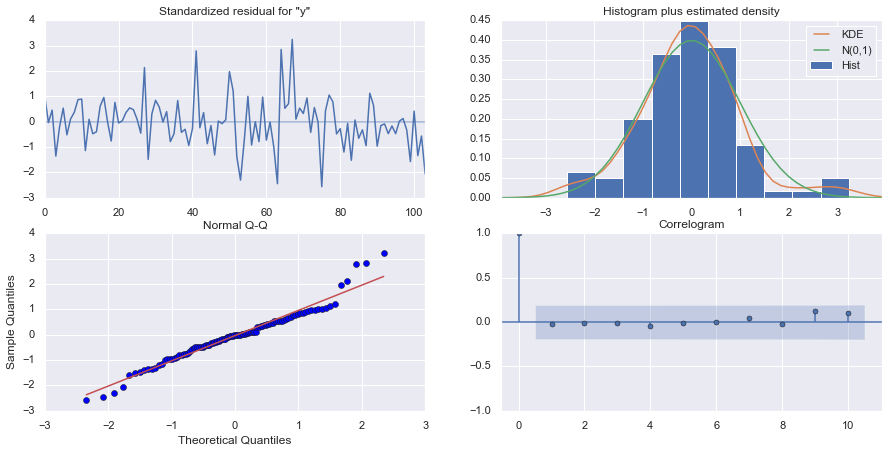

In [137]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

<div class="mark">Insights </div><i class="fa fa-lightbulb "></i>

* Form Standardize residual for "Y" we infer that is no pattern found in the error part.

* By looking at the diagnostics plots like (  Histogram and Normal Q-Q ) we infer that errors are almost normally distributed.

* From correlogram we infer that correlation coff. of error terms is zero and we can seee that none of the errors are significant.(i.e No error term crossing the cut-off). 

#### Predict on the Test Set using the Auto  SARIMA model and Evaluate the model.

In [138]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [139]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.403511  388.342697     566.265811    2088.541210
1  1315.128897  402.006691     527.210261    2103.047533
2  1621.616642  402.000289     833.710554    2409.522731
3  1598.882450  407.237670     800.711284    2397.053615
4  1392.710461  407.967866     593.108136    2192.312786

In [140]:
rmse = mean_squared_error(test['Sparkling Wine Sales'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

528.591167953671


In [141]:
auto_sarima_12_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Auto_SARIMA(1,1,2)(1,0,2,12)'])


model_resultsDf = pd.concat([model_resultsDf,auto_sarima_12_resultsDf])

model_resultsDf

Test RMSE
Auto_ARIMA(2,1,2)             1374.336485
Auto_SARIMA(1,1,2)(2,0,2,6)    626.958678
Auto_SARIMA(1,1,2)(1,0,2,12)   528.591168

#### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

##### ARIMA model based on the cut-off points of ACF and PACF.

######  ACF and PACF plots to get the values for p and q.

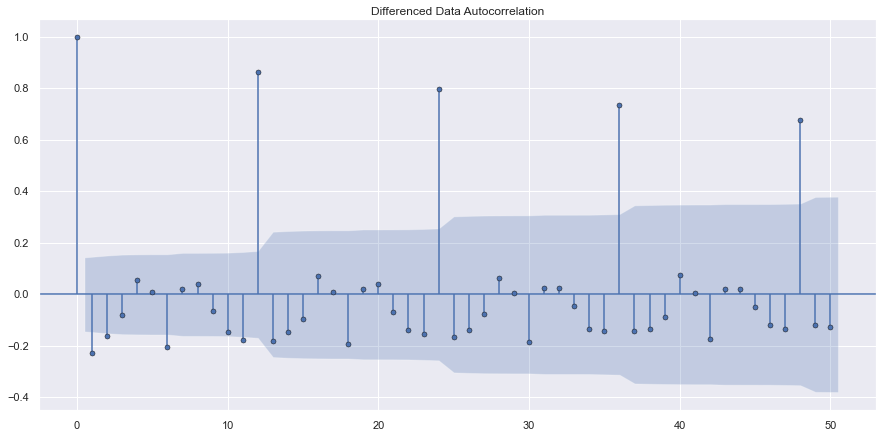

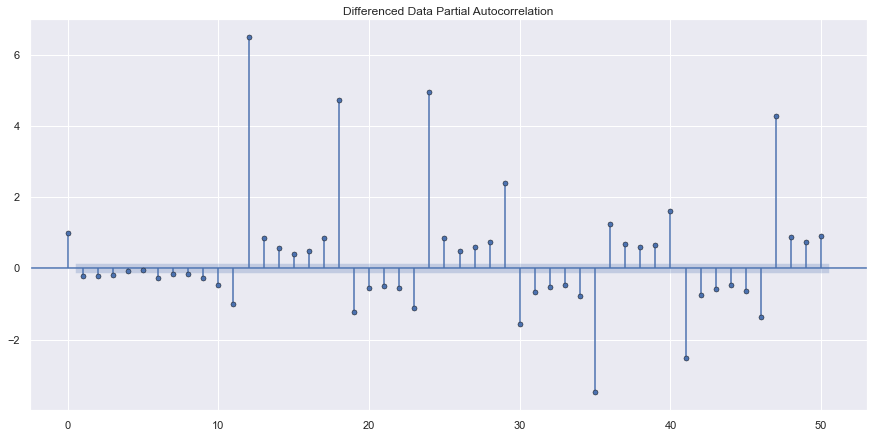

In [142]:
plot_acf(df['Sparkling Wine Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling Wine Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Conclusion

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 3.

* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.

###### Building ARIMA  model based on the cut-off points of ACF and PACF.

In [143]:
manual_ARIMA = ARIMA(train['Sparkling Wine Sales'].astype('float64'), order=(3,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               ARIMA Model Results                                
Dep. Variable:     D.Sparkling Wine Sales   No. Observations:                  131
Model:                     ARIMA(3, 1, 2)   Log Likelihood               -1107.464
Method:                           css-mle   S.D. of innovations           1106.284
Date:                    Mon, 20 Dec 2021   AIC                           2228.928
Time:                            17:53:00   BIC                           2249.054
Sample:                        02-29-1980   HQIC                          2237.106
                             - 12-31-1990                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            5.9847      3.643      1.643      0.100      -1.156      13.126
ar.L1.D.Sparkling Wine Sales    -0.4419   1.7

###### Predict on the Test Set using the Mannual ARIMA model and evaluate the model.

In [144]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [145]:
rmse = mean_squared_error(test['Sparkling Wine Sales'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

1379.0900674284858


In [146]:
manual_arima_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual_ARIMA(3,1,2)'])


model_resultsDf = pd.concat([model_resultsDf,manual_arima_resultsDf])

model_resultsDf

Test RMSE
Auto_ARIMA(2,1,2)             1374.336485
Auto_SARIMA(1,1,2)(2,0,2,6)    626.958678
Auto_SARIMA(1,1,2)(1,0,2,12)   528.591168
Manual_ARIMA(3,1,2)           1379.090067

##### Manual SARIMA model based on the cut-off points of ACF and PACF.

###### Build a version of the Manual SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

##### Let us look at the original series.

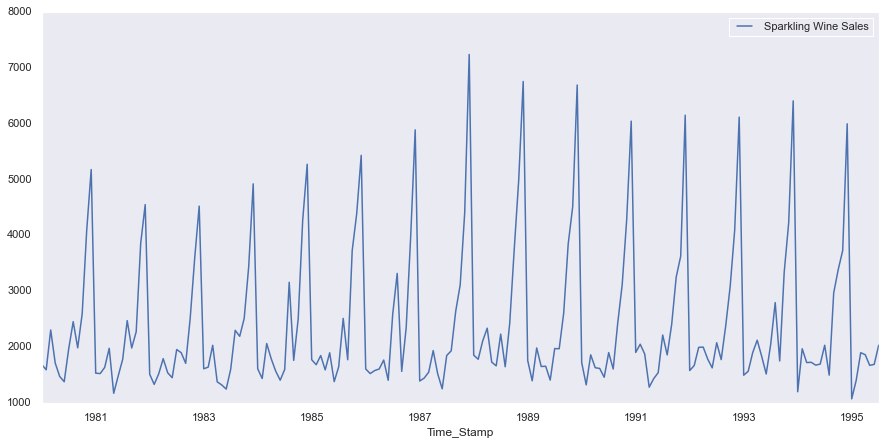

In [147]:
df.plot()
plt.grid();

**We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.**

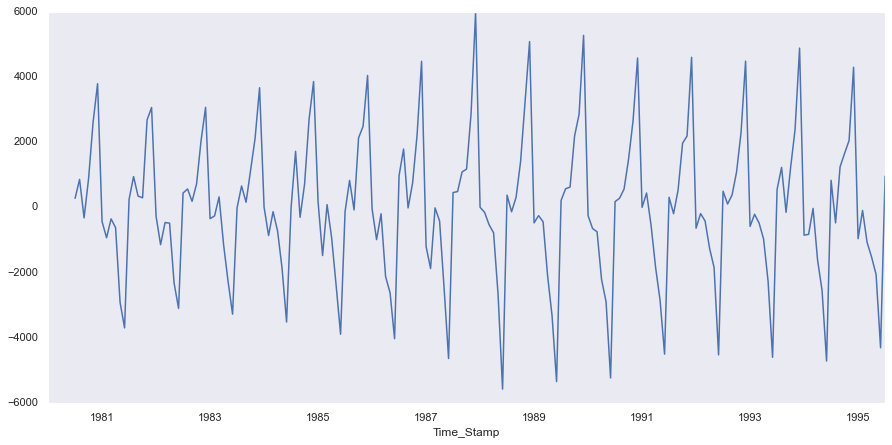

In [148]:
(df['Sparkling Wine Sales'].diff(6)).plot() #we take diff order of 6 because we have seasonality of that order.
plt.grid();

Conclusion

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

##### Checking the Stationarity - Dickey-Fuller Test

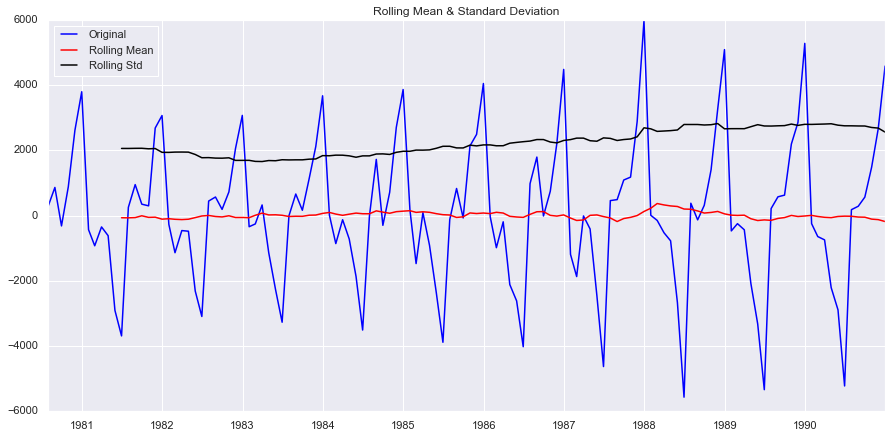

Results of Dickey-Fuller Test:
Test Statistic                -8.181919e+00
p-value                        8.088278e-13
#Lags Used                     6.000000e+00
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [149]:
test_stationarity((train['Sparkling Wine Sales'].diff(6).dropna())) #D=0

Result

As the looking ate the p-value we conclude that the series is stationary.We donot want further differencing of seasonal differenced series as we found it stationary so we get value of D=0.

##### Ploting ACF AND PACF Plots with Seasonal Diff to get the Value of P AND Q.

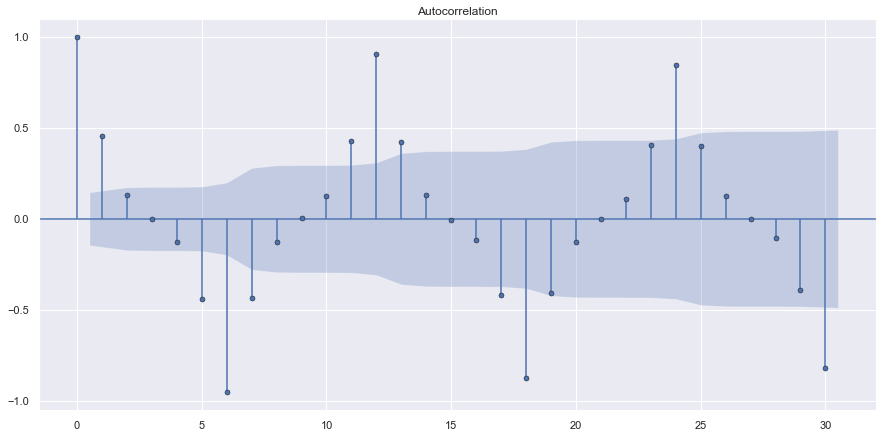

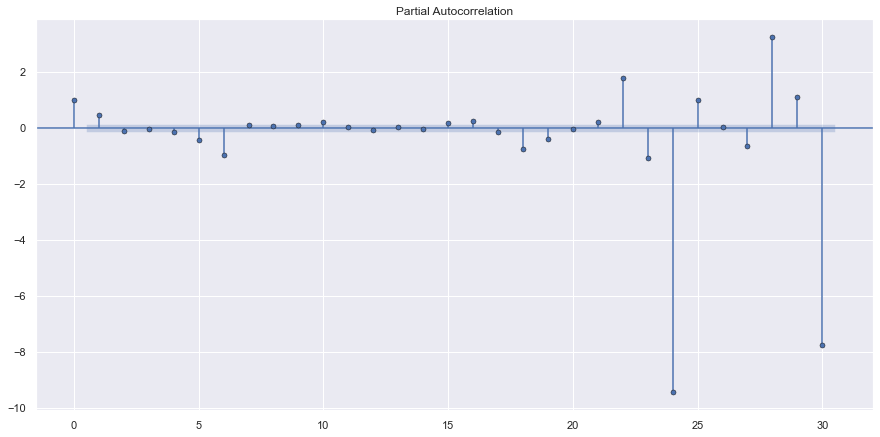

In [150]:
plot_acf((df['Sparkling Wine Sales'].diff(6).dropna()).dropna(),lags=30)
plot_pacf((df['Sparkling Wine Sales'].diff(6).dropna()).dropna(),lags=30);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6. We will keep the p ,d and q parameters same as the Mannual ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0.We get value of P = 2
The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0. We get value of Q=1
Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).

##### Building the Manual SARIMA Model at Seasonality 6.

In [151]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling Wine Sales'].values,
                                order=(3, 1, 2),
                                seasonal_order=(2, 0, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(2, 0, [1], 6)   Log Likelihood                -865.222
Date:                             Mon, 20 Dec 2021   AIC                           1748.443
Time:                                     17:53:03   BIC                           1773.226
Sample:                                          0   HQIC                          1758.503
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5337      0.197     -2.704      0.007      -0.921      -0.147
ar.L2          0.0669      

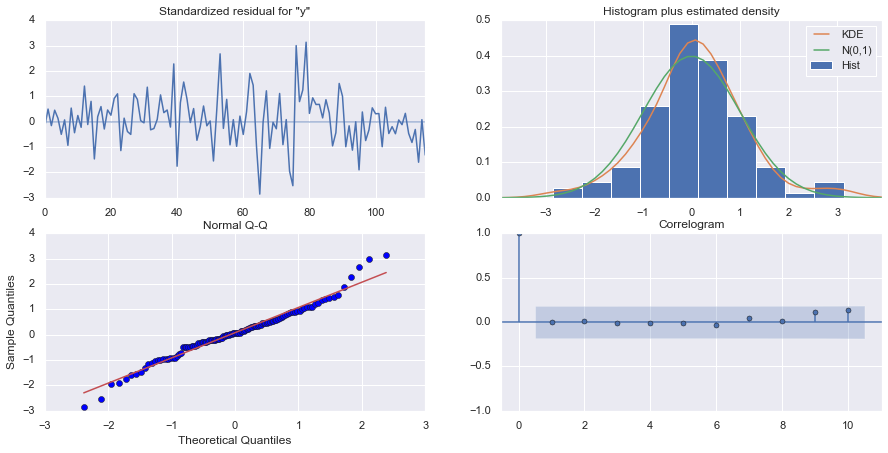

In [152]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

Results

The model diagnostics plot looks okay.

##### Predict on the Test Set using this Manual SARIMA model and evaluate the model.

In [153]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [154]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1566.159861  415.445780     751.901096    2380.418627
1  1446.132287  434.636978     594.259464    2298.005110
2  1828.559188  435.951872     974.109220    2683.009155
3  1627.470666  436.709747     771.535291    2483.406041
4  1567.439846  436.854451     711.220856    2423.658836

In [155]:
rmse = mean_squared_error(test['Sparkling Wine Sales'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

343.35524809778116


In [156]:
manual_sarima_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual SARIMA(3,1,2)(2,0,1,6)'])


model_resultsDf = pd.concat([model_resultsDf,manual_sarima_resultsDf])

model_resultsDf

Test RMSE
Auto_ARIMA(2,1,2)              1374.336485
Auto_SARIMA(1,1,2)(2,0,2,6)     626.958678
Auto_SARIMA(1,1,2)(1,0,2,12)    528.591168
Manual_ARIMA(3,1,2)            1379.090067
Manual SARIMA(3,1,2)(2,0,1,6)   343.355248

##### Build a version of the Manual SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12.


##### Let us look at the original series.

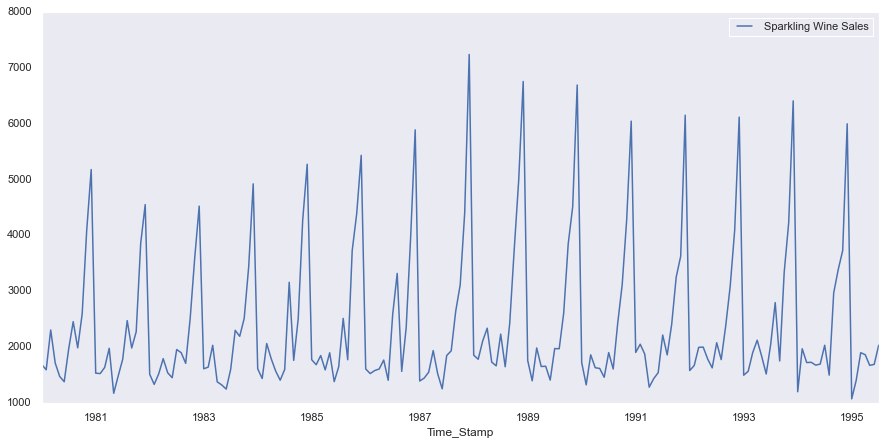

In [157]:
df.plot()
plt.grid();

**We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.**

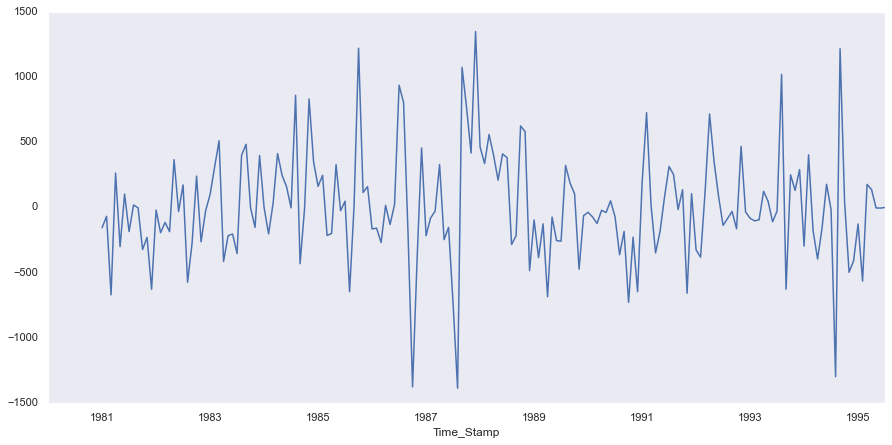

In [158]:
(df['Sparkling Wine Sales'].diff(12)).plot() #we take diff order of 12 because we have seasonality of that order.
plt.grid();

Lets check the stationarity of the diff time series whether it is stationarized or not.

##### Checking the Stationarity - Dickey-Fuller Test

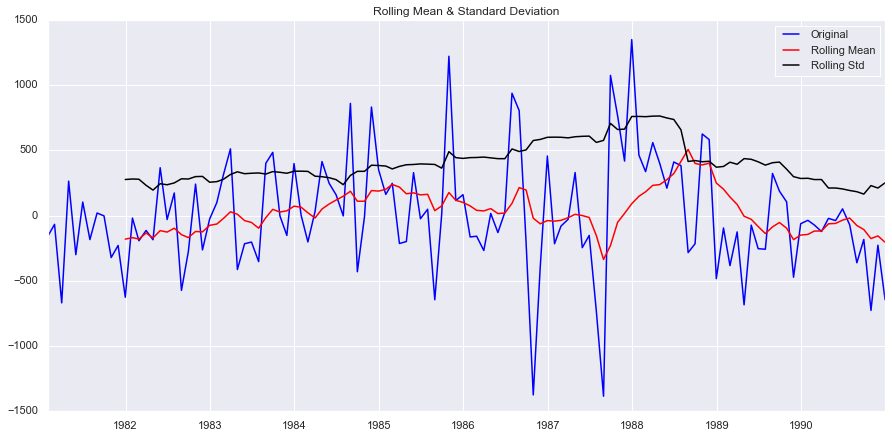

Results of Dickey-Fuller Test:
Test Statistic                  -3.136812
p-value                          0.023946
#Lags Used                      11.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [159]:
test_stationarity((train['Sparkling Wine Sales'].diff(12).dropna())) #D=0

##### Result
As the looking ate the p-value we conclude that the series is stationary.We donot want further differencing of seasonal differenced series as we found it stationary so we get value of D=0.

##### Ploting ACF AND PACF Plots with Seasonal Diff to get the Value of P AND Q.

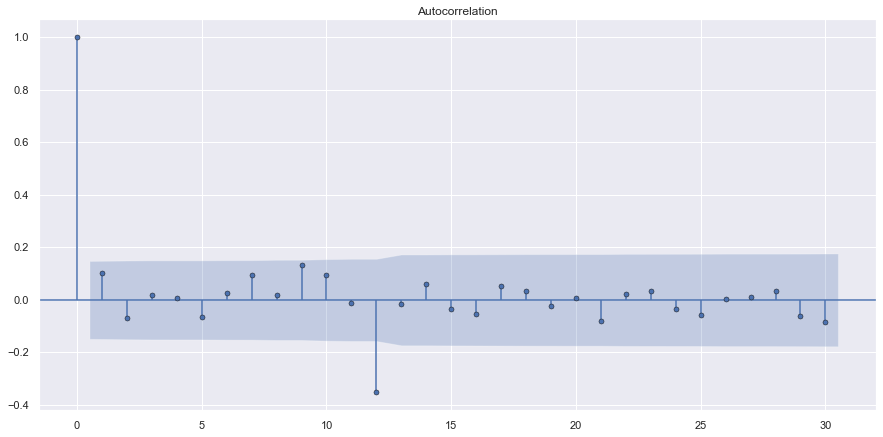

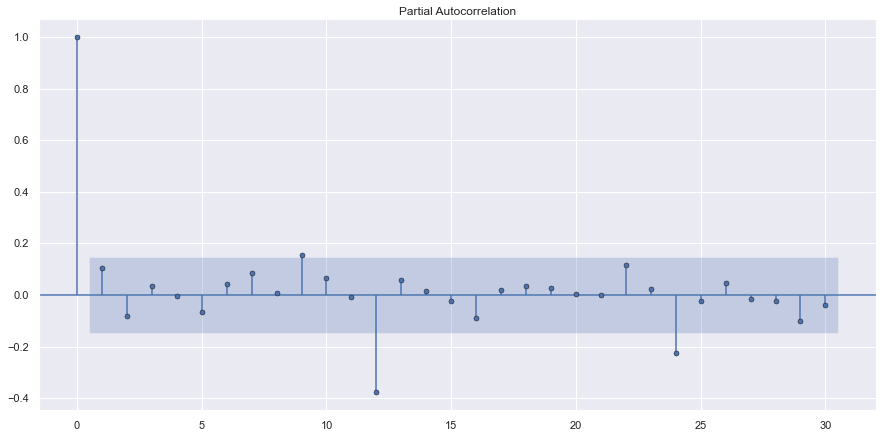

In [160]:
plot_acf((df['Sparkling Wine Sales'].diff(12).dropna()).dropna(),lags=30)
plot_pacf((df['Sparkling Wine Sales'].diff(12).dropna()).dropna(),lags=30);

Here, we have taken alpha=0.05.
We are going to take the seasonal period as 12. We will keep the p ,d and q parameters same as the Mannual ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0.We get value of P = 0.

The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0. We get value of Q= 0.

##### Building the Manual SARIMA Model at Seasonality 12.

In [161]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling Wine Sales'].values,
                                order=(3, 1, 2),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -1087.657
Date:                Mon, 20 Dec 2021   AIC                           2187.315
Time:                        17:53:05   BIC                           2204.427
Sample:                             0   HQIC                          2194.267
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4328      0.210     -2.066      0.039      -0.843      -0.022
ar.L2          0.3206      0.167      1.926      0.054      -0.006       0.647
ar.L3         -0.2487      0.258     -0.964      0.3

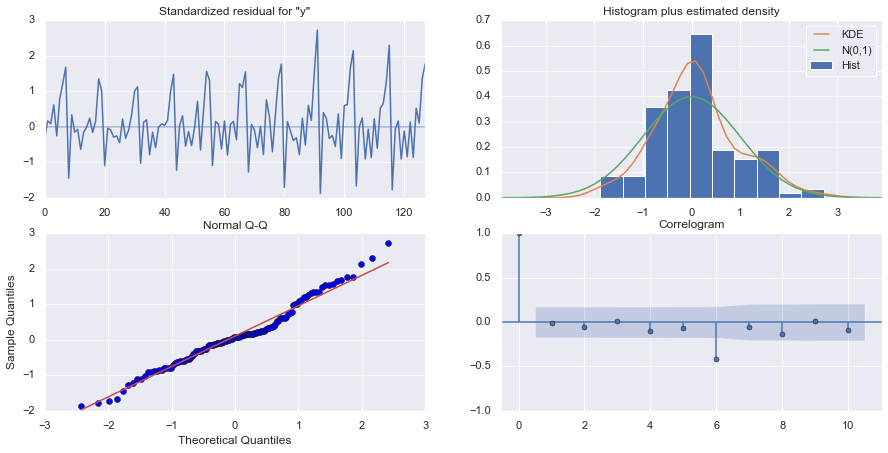

In [162]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

##### Predict on the Test Set using this model and evaluate the model.

In [163]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [164]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean      mean_se  mean_ci_lower  mean_ci_upper
0  3769.532791  1330.849865    1161.114987    6377.950595
1  2745.173158  1537.441023    -268.155875    5758.502190
2  2020.267505  1544.907583   -1007.695718    5048.230728
3  2572.088046  1547.606616    -461.165183    5605.341275
4  2355.645527  1548.248218    -678.865219    5390.156273

In [165]:
rmse = mean_squared_error(test['Sparkling Wine Sales'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

1282.4983982484705


In [166]:
manual_sarima_12_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual SARIMA(3,1,2)(0,0,0,12)'])


model_resultsDf = pd.concat([model_resultsDf,manual_sarima_12_resultsDf])

model_resultsDf

Test RMSE
Auto_ARIMA(2,1,2)               1374.336485
Auto_SARIMA(1,1,2)(2,0,2,6)      626.958678
Auto_SARIMA(1,1,2)(1,0,2,12)     528.591168
Manual_ARIMA(3,1,2)             1379.090067
Manual SARIMA(3,1,2)(2,0,1,6)    343.355248
Manual SARIMA(3,1,2)(0,0,0,12)  1282.498398

#### 8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [167]:
Finalised_TSF_model_resultsDf = pd.concat([Model_Results_Df,model_resultsDf],axis=0)
Finalised_TSF_model_resultsDf

Test RMSE
Regression On Time                                   1389.135175
Naive Model                                          3864.279352
Simple Average Model                                 1275.081804
2 Point Trailing Moving Average                       813.400684
4 Point Trailing Moving Average                      1156.589694
6 PointTrailing Moving Average                       1283.927428
9 PointTrailing Moving Average                       1346.278315
Alpha=0.0496,Simple Exponential Smoothing            1316.034674
Alpha=0.3,Simple Exponential Smoothing               1935.507132
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...    469.591666
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    392.786198
Auto_ARIMA(2,1,2)                                    1374.336485
Auto_SARIMA(1,1,2)(2,0,2,6)                           626.958678
Auto_SARIMA(1,1,2)(1,0,2,12)                          528.591168
Manual_ARIMA(3,1,2)                                  1379.090067
Manual SARIMA(3,1,2)(2,0,1,6)                         343.355248
Manual SARIMA(3,1,2)(0,0,0,12)                       1282.498398

In [168]:
Finalised_TSF_model_resultsDf.sort_values(by=['Test RMSE']).head()

Test RMSE
Manual SARIMA(3,1,2)(2,0,1,6)                       343.355248
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...  392.786198
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...  469.591666
Auto_SARIMA(1,1,2)(1,0,2,12)                        528.591168
Auto_SARIMA(1,1,2)(2,0,2,6)                         626.958678

#### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.


In [169]:
Finalised_TSF_model_resultsDf.sort_values(by=['Test RMSE']).head()

Test RMSE
Manual SARIMA(3,1,2)(2,0,1,6)                       343.355248
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...  392.786198
Alpha=0.111,Beta=0.061,Gamma=0.395,TripleExpone...  469.591666
Auto_SARIMA(1,1,2)(1,0,2,12)                        528.591168
Auto_SARIMA(1,1,2)(2,0,2,6)                         626.958678

Conclusion 

From  the above Test RMSE results we conclude that Manual SARIMA(3,1,2)(2,0,1,6) is the best model with least RMSE among all the models.

##### Building the most optimum model on the Full Data.

In [170]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling Wine Sales'],
                                order=(3,1,2),
                                seasonal_order=(2, 0, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                Sparkling Wine Sales   No. Observations:                  187
Model:             SARIMAX(3, 1, 2)x(2, 0, [1], 6)   Log Likelihood               -1307.874
Date:                             Mon, 20 Dec 2021   AIC                           2633.747
Time:                                     17:53:08   BIC                           2662.022
Sample:                                 01-31-1980   HQIC                          2645.220
                                      - 07-31-1995                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.2752      0.064    -35.547      0.000      -2.401      -2.150
ar.L2         -1.6992      

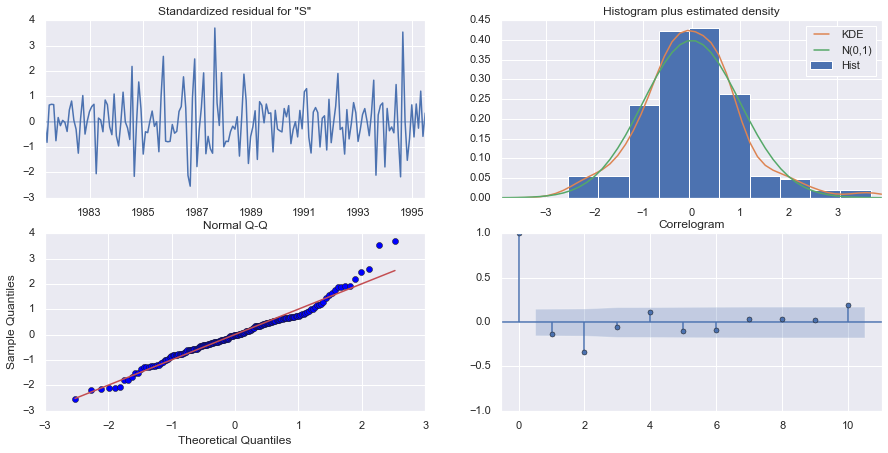

In [171]:
results_full_data_model.plot_diagnostics();

##### Evaluate the model on the whole and predict 12 months into the future.

In [172]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [173]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Sparkling Wine Sales         mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31            1931.746888  495.998331     959.608022    2903.885753
1995-09-30            2870.384593  598.268696    1697.799495    4042.969691
1995-10-31            3656.218245  692.895693    2298.167642    5014.268848
1995-11-30            3862.088083  799.162541    2295.758284    5428.417881
1995-12-31            6009.725671  862.484226    4319.287650    7700.163691

In [174]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).tail()

Sparkling Wine Sales         mean      mean_se  mean_ci_lower  mean_ci_upper
1996-03-31            2278.298766  1174.522437     -23.722909    4580.320441
1996-04-30            1893.001580  1258.137207    -572.902034    4358.905195
1996-05-31            2096.400050  1351.609881    -552.706638    4745.506737
1996-06-30            1554.347009  1428.416961   -1245.298791    4353.992808
1996-07-31            2580.567060  1506.185391    -371.502060    5532.636180

Observation:
    

In [175]:
rmse = mean_squared_error(df['Sparkling Wine Sales'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 861.8998226009788


In [176]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))

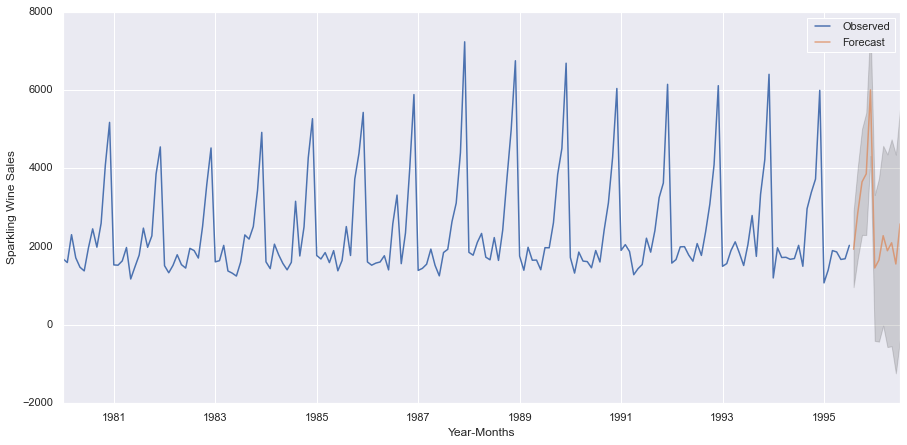

In [177]:
# plot the forecast along with the confidence band

axis = df['Sparkling Wine Sales'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling Wine Sales')
plt.legend(loc='best')
plt.show()

**Insights**

From the Plot of the forecast on full data along with the confidence band we infer that with 95% of the confidence level we found that forecast also follows the same pattern as original sparkling wine sales series follows.

#### 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.


The purpose of this whole exercise is to explore the dataset , analyse and forecast  Sparkling Wine Sales in the 20th century.Here we perform the exploratory data analysis & apply various time series forecasting models like Linear Regression , Navie Forecast ,Simple Average , Moving Average and various kind of exponential smoothing models like (Simple , Double , Triple Exponential ) and ARIMA / SARIMA models on the Sparkling Wine Sales dataset and check their RMSE on the test data , model which gives the least RMSE will be the final model for us to analyse and forecast the Sparkling Wine Sales in the 20th century.

**Insights of EDA /  Data Visualization and Time Series Forecasting Models**  :

We notice that in original sparkling wine time series there is some kind of increasing trend in the initial years which stabilizes as the years (or more specifically the months in each of the years) progresses and after 1988 sales decreases . There is some kind of seasonality associated in the data as well.
Description of the Original Sparkling Wine Sales Time Series 
 
Sparkling Wine Sales ranges from a minimum of 1070 to maximum of 7242.
Mean of the Sparkling Wine Sales is around 2402.417112.
Standard Deviation of the Sparkling Wine Sales is 1295.111540.
25% , 50% (median) and 75 % of Sparkling Wine Sales are 1605 , 1874 and 2549.
Information about the Original Sparkling Wine Sales Time Series
 
From the above results we can see that there is no null values present in the dataset.Their are total 187 entries of Sparkling wines Sales as per Monthly frequency in this dataset,indexed from 1980-01-31 to 1995-07-31.Sparkling Wine Sales column have d-type of int64. Memory used by the dataset: 2.9 KB.
The Sparkling.csv data set has 187 observations (rows) and 1 variable (column named as Sparkling Wine Sales) in the dataset.

**Year on Year boxplot for the Sparkling Wine Sales Insights**

As we got to know from the Time Series plot, the box-plots over here also indicates a measure of trend being present. Also, we see that the Sparkling Wine Sales have outliers for the years.
Box-plot of Year 1988 have max median value,we can clearly infer that year 1988 have maximum Sparkling Wine Sales.
Box-plot of Year 1995 have min median value,we can clearly infer that year 1995 have minimum Sparkling Wine Sales.

**Monthly Box-Plot for the Sparkling Wine Sales Taking all the Years into Account Insights**

The Box-Plots for the monthly Sparkling Wine Sales for different years doesn't show too much outliers only month 1 , 2 & 7 show outliers , rest doesn't show any outliers.
From September to December the Sparkling Wine Sales increasing , so this the period where the Sparkling Wine Sales is highest.
There is seasonality also every year from September to December the Sparkling Wine Sales increasing.
In June month we have lowest sales of the Sparkling Wine.

**Month-plot of Sparkling Wine Sales Time Series Insights**

As noticed in the above box-plot we get same result from here too. From September to December Sparkling Wine Sales goes on increasing.
December month have the highest sales of the Sparkling Wine while June month have lowest sales of the Sparkling Wine.

**Plot for different months for different years of Original Time Series Insights**

This plot gives us information about the monthly trend across the years.Here in this plot every line is a month tells us about the sales of Sparkling Wines of each month across the year.This is way to show year on year monthly trend.


From the above plot we clearly infer that December month have highest sales of Sparking Wine.
June month have the lowest sales of the Sparkling Wine.

Here we apply various time series forecasting models like Linear Regression , Navie Forecast ,Simple Average , Moving Average and various kind of exponential smoothing models like (Simple , Double , Triple Exponential ) and ARIMA / SARIMA models on the Sparkling Wine Sales dataset and check their RMSE on the test data , After comparing the TEST RMSE of all the model that we built. We come know that the TEST RMSE of Manual SARIMA(3,1,2)(2,0,1,6)  is least  among all the models with different parameters. So we take Manual SARIMA(3,1,2)(2,0,1,6) model to built complete data and predict 12 months into the future with appropriate confidence intervals/bands.

RMSE of the Full Model is - 861.8998226009788

From the Plot of the forecast on full data along with the confidence band we infer that with 95% of the confidence level we found that forecast also follows the same pattern as original sparkling wine sales series follows.


**Recommendations:**


The ABC Estate Wines company should focus on key strengths & develop marketing strategies to promote Sparkling Wine Sales . As we From Sept to Dec the Sparkling wine sales are higher.But in the month of May & June  it was low showing less people consumes wine in this period so wine company can run various offers during this period to boost their sparkling  wine sales.ABC Estate wines company gives various offers like buy 1 get 1 or some interesting gifts on purchase of sparkling wine to attract more customers. Introduce some new flavour of sparkling wine can attract consumers which leads to increase in their wine sales during this period.

                                   -The End-